<b><h1><u><font color='red'><center>CLUSTERING ANALYSIS<br>

<b><h2><u><font color='blue'>Business Objective:<br>

<b><h3>Creating clusters on global development measurement dataset

# New Section

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

In [2]:
from google.colab import files
uploaded=files.upload()

Saving World_development_mesurement (1).xlsx to World_development_mesurement (1).xlsx


In [3]:
data = pd.read_excel(r'World_development_mesurement (1).xlsx',sheet_name='world_development')

In [4]:
#Let us view the data points.
data.head()

Birth Rate Business Tax Rate  CO2 Emissions       Country  \
0       0.020               NaN        87931.0       Algeria   
1       0.050               NaN         9542.0        Angola   
2       0.043               NaN         1617.0         Benin   
3       0.027               NaN         4276.0      Botswana   
4       0.046               NaN         1041.0  Burkina Faso   

   Days to Start Business  Ease of Business  Energy Usage              GDP  \
0                     NaN               NaN       26998.0  $54,790,058,957   
1                     NaN               NaN        7499.0   $9,129,594,819   
2                     NaN               NaN        1983.0   $2,359,122,303   
3                     NaN               NaN        1836.0   $5,788,311,645   
4                     NaN               NaN           NaN   $2,610,959,139   

   Health Exp % GDP Health Exp/Capita  ...  Life Expectancy Male  \
0             0.035               $60  ...                  67.0   
1             0.034               $22  ...                  44.0   
2             0.043               $15  ...                  53.0   
3             0.047              $152  ...                  49.0   
4             0.051               $12  ...                  49.0   

   Mobile Phone Usage  Number of Records  Population 0-14  Population 15-64  \
0                 0.0                  1            0.342             0.619   
1                 0.0                  1            0.476             0.499   
2                 0.0                  1            0.454             0.517   
3                 0.1                  1            0.383             0.587   
4                 0.0                  1            0.468             0.505   

   Population 65+  Population Total  Population Urban  Tourism Inbound  \
0           0.039          31719449             0.599     $102,000,000   
1           0.025          13924930             0.324      $34,000,000   
2           0.029           6949366             0.383      $77,000,000   
3           0.029           1755375             0.532     $227,000,000   
4           0.028          11607944             0.178      $23,000,000   

   Tourism Outbound  
0      $193,000,000  
1      $146,000,000  
2       $50,000,000  
3      $209,000,000  
4       $30,000,000  

[5 rows x 25 columns]

<b><h1>EXPLORATORY DATA ANALYSIS (EDA)

In [5]:
#Data types of the given data set
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

<b><h3>GDP, Helath Exp/Capita, Tourism inbound and outbound are taken as objects but as to be converted into numerical for further analysis

In [6]:
#Number of empty rows present in the respective columns
data.isnull().sum()

Birth Rate                 119
Business Tax Rate         1281
CO2 Emissions              579
Country                      0
Days to Start Business     986
Ease of Business          2519
Energy Usage               919
GDP                        210
Health Exp % GDP           309
Health Exp/Capita          309
Hours to do Tax           1288
Infant Mortality Rate      260
Internet Usage             173
Lending Interest           824
Life Expectancy Female     136
Life Expectancy Male       136
Mobile Phone Usage         167
Number of Records            0
Population 0-14            220
Population 15-64           220
Population 65+             220
Population Total             0
Population Urban            26
Tourism Inbound            368
Tourism Outbound           471
dtype: int64

<b><h3>Only Country,Number of records and total population columns does not contain any empty rows in them.

<b><h1>DATA CLEANING

In [7]:
data.shape

(2704, 25)

Columns,<br>
Bussiness Tax rate has 47% Null records<br>
Ease of Bussiness has 93% Null records<br>
Hours to do tax has 48% Null records<br>
we can drop these columns.

In [8]:
data_2 = data.drop(['Business Tax Rate','Ease of Business','Hours to do Tax'],axis=1)
data_2

Birth Rate  CO2 Emissions                   Country  \
0          0.020        87931.0                   Algeria   
1          0.050         9542.0                    Angola   
2          0.043         1617.0                     Benin   
3          0.027         4276.0                  Botswana   
4          0.046         1041.0              Burkina Faso   
...          ...            ...                       ...   
2699         NaN            NaN  Turks and Caicos Islands   
2700       0.013            NaN             United States   
2701       0.015            NaN                   Uruguay   
2702       0.020            NaN             Venezuela, RB   
2703       0.011            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage                  GDP  \
0                        NaN       26998.0      $54,790,058,957   
1                        NaN        7499.0       $9,129,594,819   
2                        NaN        1983.0       $2,359,122,303   
3                        NaN        1836.0       $5,788,311,645   
4                        NaN           NaN       $2,610,959,139   
...                      ...           ...                  ...   
2699                     NaN           NaN                  NaN   
2700                     5.0     2132446.0  $16,244,600,000,000   
2701                     7.0           NaN      $50,004,354,667   
2702                   144.0           NaN     $381,286,223,859   
2703                     NaN           NaN                  NaN   

      Health Exp % GDP Health Exp/Capita  Infant Mortality Rate  \
0                0.035               $60                  0.034   
1                0.034               $22                  0.128   
2                0.043               $15                  0.090   
3                0.047              $152                  0.054   
4                0.051               $12                  0.096   
...                ...               ...                    ...   
2699               NaN               NaN                    NaN   
2700             0.179            $8,895                  0.006   
2701             0.089            $1,308                  0.010   
2702             0.046              $593                  0.013   
2703               NaN               NaN                    NaN   

      Internet Usage  ...  Life Expectancy Male  Mobile Phone Usage  \
0                0.0  ...                  67.0                 0.0   
1                0.0  ...                  44.0                 0.0   
2                0.0  ...                  53.0                 0.0   
3                0.0  ...                  49.0                 0.1   
4                0.0  ...                  49.0                 0.0   
...              ...  ...                   ...                 ...   
2699             NaN  ...                   NaN                 NaN   
2700             0.8  ...                  76.0                 1.0   
2701             0.5  ...                  74.0                 1.5   
2702             0.5  ...                  72.0                 1.0   
2703             0.4  ...                  76.0                 NaN   

      Number of Records  Population 0-14  Population 15-64  Population 65+  \
0                     1            0.342             0.619           0.039   
1                     1            0.476             0.499           0.025   
2                     1            0.454             0.517           0.029   
3                     1            0.383             0.587           0.029   
4                     1            0.468             0.505           0.028   
...                 ...              ...               ...             ...   
2699                  1              NaN               NaN             NaN   
2700                  1            0.196             0.667           0.136   
2701                  1            0.220             0.639           0.140   
2702                  1       

In [9]:
#Let us remove the '$' sign from the columns
for i in data_2[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']]:
    data_2[i] = data_2[i].str.replace('$','')
data_2

Birth Rate  CO2 Emissions                   Country  \
0          0.020        87931.0                   Algeria   
1          0.050         9542.0                    Angola   
2          0.043         1617.0                     Benin   
3          0.027         4276.0                  Botswana   
4          0.046         1041.0              Burkina Faso   
...          ...            ...                       ...   
2699         NaN            NaN  Turks and Caicos Islands   
2700       0.013            NaN             United States   
2701       0.015            NaN                   Uruguay   
2702       0.020            NaN             Venezuela, RB   
2703       0.011            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage                 GDP  \
0                        NaN       26998.0      54,790,058,957   
1                        NaN        7499.0       9,129,594,819   
2                        NaN        1983.0       2,359,122,303   
3                        NaN        1836.0       5,788,311,645   
4                        NaN           NaN       2,610,959,139   
...                      ...           ...                 ...   
2699                     NaN           NaN                 NaN   
2700                     5.0     2132446.0  16,244,600,000,000   
2701                     7.0           NaN      50,004,354,667   
2702                   144.0           NaN     381,286,223,859   
2703                     NaN           NaN                 NaN   

      Health Exp % GDP Health Exp/Capita  Infant Mortality Rate  \
0                0.035                60                  0.034   
1                0.034                22                  0.128   
2                0.043                15                  0.090   
3                0.047               152                  0.054   
4                0.051                12                  0.096   
...                ...               ...                    ...   
2699               NaN               NaN                    NaN   
2700             0.179             8,895                  0.006   
2701             0.089             1,308                  0.010   
2702             0.046               593                  0.013   
2703               NaN               NaN                    NaN   

      Internet Usage  ...  Life Expectancy Male  Mobile Phone Usage  \
0                0.0  ...                  67.0                 0.0   
1                0.0  ...                  44.0                 0.0   
2                0.0  ...                  53.0                 0.0   
3                0.0  ...                  49.0                 0.1   
4                0.0  ...                  49.0                 0.0   
...              ...  ...                   ...                 ...   
2699             NaN  ...                   NaN                 NaN   
2700             0.8  ...                  76.0                 1.0   
2701             0.5  ...                  74.0                 1.5   
2702             0.5  ...                  72.0                 1.0   
2703             0.4  ...                  76.0                 NaN   

      Number of Records  Population 0-14  Population 15-64  Population 65+  \
0                     1            0.342             0.619           0.039   
1                     1            0.476             0.499           0.025   
2                     1            0.454             0.517           0.029   
3                     1            0.383             0.587           0.029   
4                     1            0.468             0.505           0.028   
...                 ...              ...               ...             ...   
2699                  1              NaN               NaN             NaN   
2700                  1            0.196             0.667           0.136   
2701                  1            0.220             0.639           0.140   
2702                  1            0.288  

In [10]:
#Let's convert the above columns datatype to numerical
for i in data_2[['GDP','Health Exp/Capita','Tourism Inbound','Tourism Outbound']]:
    data_2[i] = data_2[i].str.replace(',','').astype(float)
data_2

Birth Rate  CO2 Emissions                   Country  \
0          0.020        87931.0                   Algeria   
1          0.050         9542.0                    Angola   
2          0.043         1617.0                     Benin   
3          0.027         4276.0                  Botswana   
4          0.046         1041.0              Burkina Faso   
...          ...            ...                       ...   
2699         NaN            NaN  Turks and Caicos Islands   
2700       0.013            NaN             United States   
2701       0.015            NaN                   Uruguay   
2702       0.020            NaN             Venezuela, RB   
2703       0.011            NaN     Virgin Islands (U.S.)   

      Days to Start Business  Energy Usage           GDP  Health Exp % GDP  \
0                        NaN       26998.0  5.479006e+10             0.035   
1                        NaN        7499.0  9.129595e+09             0.034   
2                        NaN        1983.0  2.359122e+09             0.043   
3                        NaN        1836.0  5.788312e+09             0.047   
4                        NaN           NaN  2.610959e+09             0.051   
...                      ...           ...           ...               ...   
2699                     NaN           NaN           NaN               NaN   
2700                     5.0     2132446.0  1.624460e+13             0.179   
2701                     7.0           NaN  5.000435e+10             0.089   
2702                   144.0           NaN  3.812862e+11             0.046   
2703                     NaN           NaN           NaN               NaN   

      Health Exp/Capita  Infant Mortality Rate  Internet Usage  ...  \
0                  60.0                  0.034             0.0  ...   
1                  22.0                  0.128             0.0  ...   
2                  15.0                  0.090             0.0  ...   
3                 152.0                  0.054             0.0  ...   
4                  12.0                  0.096             0.0  ...   
...                 ...                    ...             ...  ...   
2699                NaN                    NaN             NaN  ...   
2700             8895.0                  0.006             0.8  ...   
2701             1308.0                  0.010             0.5  ...   
2702              593.0                  0.013             0.5  ...   
2703                NaN                    NaN             0.4  ...   

      Life Expectancy Male  Mobile Phone Usage  Number of Records  \
0                     67.0                 0.0                  1   
1                     44.0                 0.0                  1   
2                     53.0                 0.0                  1   
3                     49.0                 0.1                  1   
4                     49.0                 0.0                  1   
...                    ...                 ...                ...   
2699                   NaN                 NaN                  1   
2700                  76.0                 1.0                  1   
2701                  74.0                 1.5                  1   
2702                  72.0                 1.0                  1   
2703                  76.0                 NaN                  1   

      Population 0-14  Population 15-64  Population 65+  Population Total  \
0               0.342             0.619           0.039          31719449   
1               0.476             0.499           0.025          13924930   
2               0.454             0.517           0.029           6949366   
3               0.383             0.587           0.029           1755375   
4               0.468             0.505           0.028          11607944   
...               ...               ...             ...               ...   
2699              NaN               NaN             NaN             32427   
2700            0.196             0.66

In [11]:
data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   CO2 Emissions           2125 non-null   float64
 2   Country                 2704 non-null   object 
 3   Days to Start Business  1718 non-null   float64
 4   Energy Usage            1785 non-null   float64
 5   GDP                     2494 non-null   float64
 6   Health Exp % GDP        2395 non-null   float64
 7   Health Exp/Capita       2395 non-null   float64
 8   Infant Mortality Rate   2444 non-null   float64
 9   Internet Usage          2531 non-null   float64
 10  Lending Interest        1880 non-null   float64
 11  Life Expectancy Female  2568 non-null   float64
 12  Life Expectancy Male    2568 non-null   float64
 13  Mobile Phone Usage      2537 non-null   float64
 14  Number of Records       2704 non-null   

In [12]:
data_2 = data_2.rename(columns={'Birth Rate': 'Birth_Rate','CO2 Emissions':'CO2_Emissions','Days to Start Business':'Days_to_Start_Business','Energy Usage':'Energy_Usage',
                            'Health Exp % GDP':'Health_Exp_GDP','Health Exp/Capita':'Health_Exp_Capita','Infant Mortality Rate':'Infant_Mortality_Rate','Internet Usage':'Internet_Usage','Lending Interest':'Lending_Interest',
                            'Life Expectancy Female':'Life_Expectancy_Female','Life Expectancy Male':'Life_Expectancy_Male','Mobile Phone Usage':'Mobile_Phone_Usage','Number of Records':'Number_of_Records','Population 0-14':'Population_0to14',
                            'Population 15-64':'Population_15to64','Population 65+':'Population_65_more','Population Total':'Population_Total','Population Urban':'Population_Urban','Tourism Inbound':'Tourism_Inbound','Tourism Outbound':'Tourism_Outbound'})
data_2.head()

Birth_Rate  CO2_Emissions       Country  Days_to_Start_Business  \
0       0.020        87931.0       Algeria                     NaN   
1       0.050         9542.0        Angola                     NaN   
2       0.043         1617.0         Benin                     NaN   
3       0.027         4276.0      Botswana                     NaN   
4       0.046         1041.0  Burkina Faso                     NaN   

   Energy_Usage           GDP  Health_Exp_GDP  Health_Exp_Capita  \
0       26998.0  5.479006e+10           0.035               60.0   
1        7499.0  9.129595e+09           0.034               22.0   
2        1983.0  2.359122e+09           0.043               15.0   
3        1836.0  5.788312e+09           0.047              152.0   
4           NaN  2.610959e+09           0.051               12.0   

   Infant_Mortality_Rate  Internet_Usage  ...  Life_Expectancy_Male  \
0                  0.034             0.0  ...                  67.0   
1                  0.128             0.0  ...                  44.0   
2                  0.090             0.0  ...                  53.0   
3                  0.054             0.0  ...                  49.0   
4                  0.096             0.0  ...                  49.0   

   Mobile_Phone_Usage  Number_of_Records  Population_0to14  Population_15to64  \
0                 0.0                  1             0.342              0.619   
1                 0.0                  1             0.476              0.499   
2                 0.0                  1             0.454              0.517   
3                 0.1                  1             0.383              0.587   
4                 0.0                  1             0.468              0.505   

   Population_65_more  Population_Total  Population_Urban  Tourism_Inbound  \
0               0.039          31719449             0.599      102000000.0   
1               0.025          13924930             0.324       34000000.0   
2               0.029           6949366             0.383       77000000.0   
3               0.029           1755375             0.532      227000000.0   
4               0.028          11607944             0.178       23000000.0   

   Tourism_Outbound  
0       193000000.0  
1       146000000.0  
2        50000000.0  
3       209000000.0  
4        30000000.0  

[5 rows x 22 columns]

In [13]:
#lets fill the empty records in the data set,
filler = data_2.drop(['Country','Number_of_Records','Population_Total'],axis=1)
filler

Birth_Rate  CO2_Emissions  Days_to_Start_Business  Energy_Usage  \
0          0.020        87931.0                     NaN       26998.0   
1          0.050         9542.0                     NaN        7499.0   
2          0.043         1617.0                     NaN        1983.0   
3          0.027         4276.0                     NaN        1836.0   
4          0.046         1041.0                     NaN           NaN   
...          ...            ...                     ...           ...   
2699         NaN            NaN                     NaN           NaN   
2700       0.013            NaN                     5.0     2132446.0   
2701       0.015            NaN                     7.0           NaN   
2702       0.020            NaN                   144.0           NaN   
2703       0.011            NaN                     NaN           NaN   

               GDP  Health_Exp_GDP  Health_Exp_Capita  Infant_Mortality_Rate  \
0     5.479006e+10           0.035               60.0                  0.034   
1     9.129595e+09           0.034               22.0                  0.128   
2     2.359122e+09           0.043               15.0                  0.090   
3     5.788312e+09           0.047              152.0                  0.054   
4     2.610959e+09           0.051               12.0                  0.096   
...            ...             ...                ...                    ...   
2699           NaN             NaN                NaN                    NaN   
2700  1.624460e+13           0.179             8895.0                  0.006   
2701  5.000435e+10           0.089             1308.0                  0.010   
2702  3.812862e+11           0.046              593.0                  0.013   
2703           NaN             NaN                NaN                    NaN   

      Internet_Usage  Lending_Interest  Life_Expectancy_Female  \
0                0.0             0.100                    71.0   
1                0.0             1.032                    47.0   
2                0.0               NaN                    57.0   
3                0.0             0.155                    52.0   
4                0.0               NaN                    52.0   
...              ...               ...                     ...   
2699             NaN               NaN                     NaN   
2700             0.8             0.033                    81.0   
2701             0.5             0.112                    80.0   
2702             0.5             0.164                    78.0   
2703             0.4               NaN                    83.0   

      Life_Expectancy_Male  Mobile_Phone_Usage  Population_0to14  \
0                     67.0                 0.0             0.342   
1                     44.0                 0.0             0.476   
2                     53.0                 0.0             0.454   
3                     49.0                 0.1             0.383   
4                     49.0                 0.0             0.468   
...                    ...                 ...               ...   
2699                   NaN                 NaN               NaN   
2700                  76.0                 1.0             0.196   
2701                  74.0                 1.5             0.220   
2702                  72.0                 1.0             0.288   
2703                  76.0                 NaN             0.206   

      Population_15to64  Population_65_more  Population_Urban  \
0                 0.619               0.039             0.599   
1                 0.499               0.025             0.324   
2                 0.517               0.029             0.383   
3                 0.587               0.029             0.532   
4                 0.505               0.028             0.178   
...                 ...                 ...               ...   
2699                NaN                 NaN             0.911   
2700              0.667               

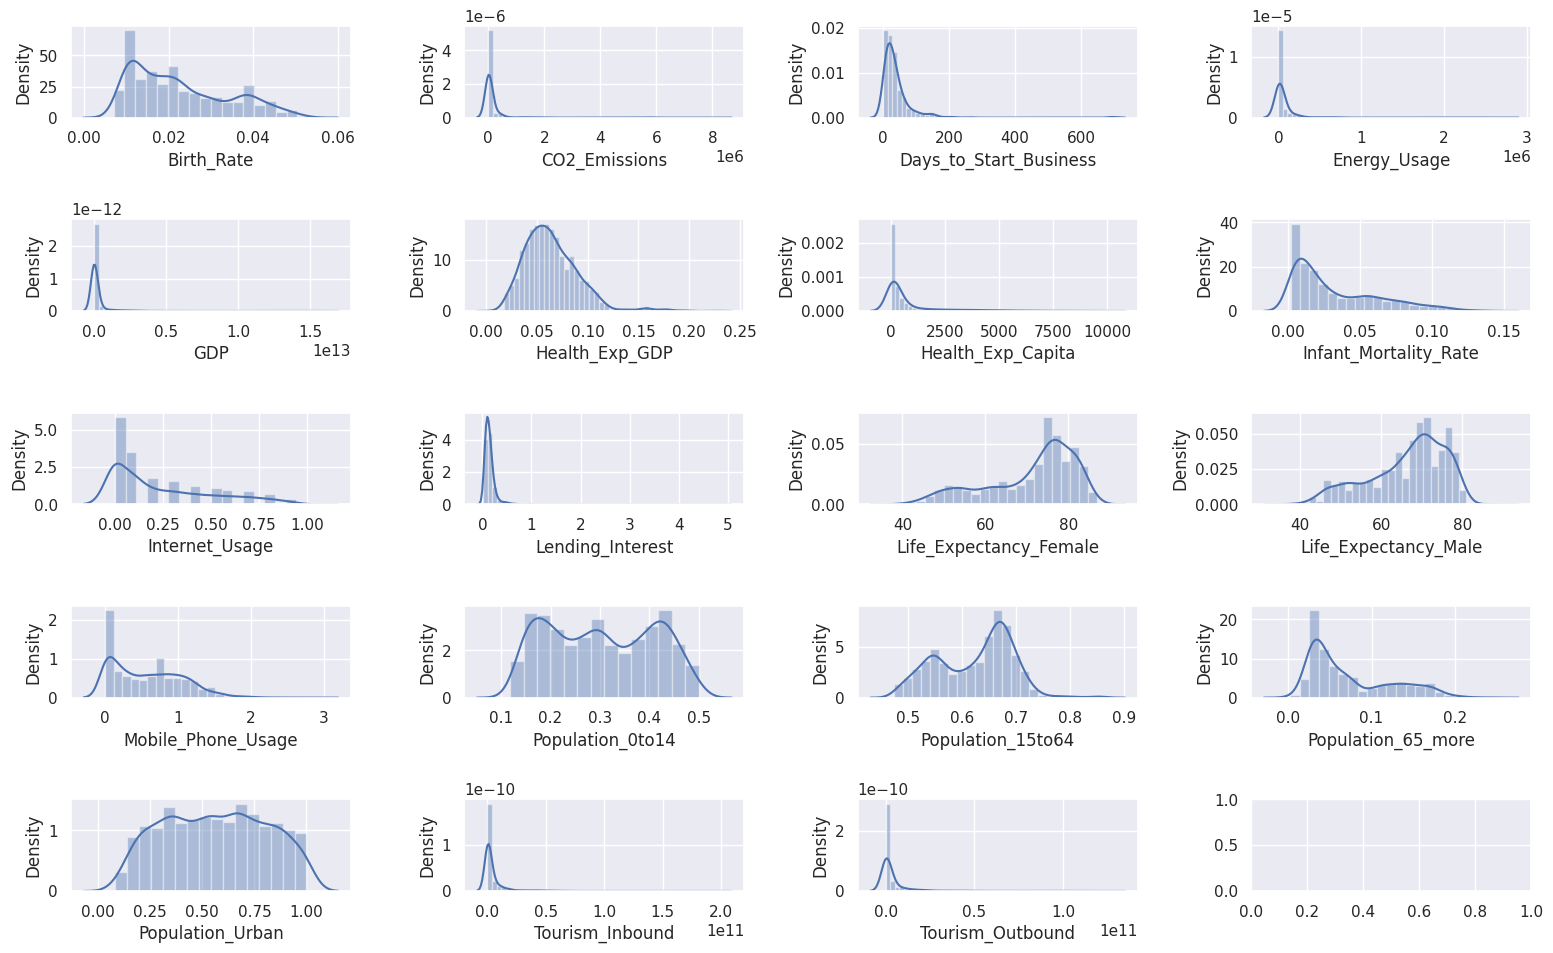

In [14]:
fig, axes=plt.subplots(5,4,figsize=(16,10),sharex=False,sharey=False)

sns.distplot(filler['Birth_Rate'], ax=axes[0,0])
sns.distplot(filler['CO2_Emissions'], ax=axes[0,1])
sns.distplot(filler['Days_to_Start_Business'], ax=axes[0,2])
sns.distplot(filler['Energy_Usage'], ax=axes[0,3])
sns.distplot(filler['GDP'], ax=axes[1,0])
sns.distplot(filler['Health_Exp_GDP'], ax=axes[1,1])
sns.distplot(filler['Health_Exp_Capita'], ax=axes[1,2])
sns.distplot(filler['Infant_Mortality_Rate'], ax=axes[1,3])
sns.distplot(filler['Internet_Usage'], ax=axes[2,0])
sns.distplot(filler['Lending_Interest'], ax=axes[2,1])
sns.distplot(filler['Life_Expectancy_Female'], ax=axes[2,2])
sns.distplot(filler['Life_Expectancy_Male'], ax=axes[2,3])
sns.distplot(filler['Mobile_Phone_Usage'], ax=axes[3,0])
sns.distplot(filler['Population_0to14'], ax=axes[3,1])
sns.distplot(filler['Population_15to64'], ax=axes[3,2])
sns.distplot(filler['Population_65_more'], ax=axes[3,3])
sns.distplot(filler['Population_Urban'], ax=axes[4,0])
sns.distplot(filler['Tourism_Inbound'], ax=axes[4,1])
sns.distplot(filler['Tourism_Outbound'], ax=axes[4,2])

plt.tight_layout(pad=2.0)

In [15]:
for i in filler[['Birth_Rate','Health_Exp_GDP','Population_0to14','Population_15to64','Population_Urban']]:
    filler[i].fillna(filler[i].mean(),inplace=True)
filler

Birth_Rate  CO2_Emissions  Days_to_Start_Business  Energy_Usage  \
0       0.020000        87931.0                     NaN       26998.0   
1       0.050000         9542.0                     NaN        7499.0   
2       0.043000         1617.0                     NaN        1983.0   
3       0.027000         4276.0                     NaN        1836.0   
4       0.046000         1041.0                     NaN           NaN   
...          ...            ...                     ...           ...   
2699    0.022715            NaN                     NaN           NaN   
2700    0.013000            NaN                     5.0     2132446.0   
2701    0.015000            NaN                     7.0           NaN   
2702    0.020000            NaN                   144.0           NaN   
2703    0.011000            NaN                     NaN           NaN   

               GDP  Health_Exp_GDP  Health_Exp_Capita  Infant_Mortality_Rate  \
0     5.479006e+10         0.03500               60.0                  0.034   
1     9.129595e+09         0.03400               22.0                  0.128   
2     2.359122e+09         0.04300               15.0                  0.090   
3     5.788312e+09         0.04700              152.0                  0.054   
4     2.610959e+09         0.05100               12.0                  0.096   
...            ...             ...                ...                    ...   
2699           NaN         0.06417                NaN                    NaN   
2700  1.624460e+13         0.17900             8895.0                  0.006   
2701  5.000435e+10         0.08900             1308.0                  0.010   
2702  3.812862e+11         0.04600              593.0                  0.013   
2703           NaN         0.06417                NaN                    NaN   

      Internet_Usage  Lending_Interest  Life_Expectancy_Female  \
0                0.0             0.100                    71.0   
1                0.0             1.032                    47.0   
2                0.0               NaN                    57.0   
3                0.0             0.155                    52.0   
4                0.0               NaN                    52.0   
...              ...               ...                     ...   
2699             NaN               NaN                     NaN   
2700             0.8             0.033                    81.0   
2701             0.5             0.112                    80.0   
2702             0.5             0.164                    78.0   
2703             0.4               NaN                    83.0   

      Life_Expectancy_Male  Mobile_Phone_Usage  Population_0to14  \
0                     67.0                 0.0          0.342000   
1                     44.0                 0.0          0.476000   
2                     53.0                 0.0          0.454000   
3                     49.0                 0.1          0.383000   
4                     49.0                 0.0          0.468000   
...                    ...                 ...               ...   
2699                   NaN                 NaN          0.303051   
2700                  76.0                 1.0          0.196000   
2701                  74.0                 1.5          0.220000   
2702                  72.0                 1.0          0.288000   
2703                  76.0                 NaN          0.206000   

      Population_15to64  Population_65_more  Population_Urban  \
0              0.619000               0.039             0.599   
1              0.499000               0.025             0.324   
2              0.517000               0.029             0.383   
3              0.587000               0.029             0.532   
4              0.505000               0.028             0.178   
...                 ...                 ...               ...   
2699           0.623481                 NaN             0.911   
2700           0.667000               

In [16]:
for i in filler[['CO2_Emissions','Days_to_Start_Business','Energy_Usage','GDP','Health_Exp_Capita','Infant_Mortality_Rate',
                 'Internet_Usage', 'Lending_Interest', 'Life_Expectancy_Female','Life_Expectancy_Male', 'Mobile_Phone_Usage',
                 'Population_65_more','Tourism_Inbound', 'Tourism_Outbound']]:
    filler[i].fillna(filler[i].median(),inplace=True)
filler

Birth_Rate  CO2_Emissions  Days_to_Start_Business  Energy_Usage  \
0       0.020000        87931.0                    26.0       26998.0   
1       0.050000         9542.0                    26.0        7499.0   
2       0.043000         1617.0                    26.0        1983.0   
3       0.027000         4276.0                    26.0        1836.0   
4       0.046000         1041.0                    26.0       14338.0   
...          ...            ...                     ...           ...   
2699    0.022715         8529.0                    26.0       14338.0   
2700    0.013000         8529.0                     5.0     2132446.0   
2701    0.015000         8529.0                     7.0       14338.0   
2702    0.020000         8529.0                   144.0       14338.0   
2703    0.011000         8529.0                    26.0       14338.0   

               GDP  Health_Exp_GDP  Health_Exp_Capita  Infant_Mortality_Rate  \
0     5.479006e+10         0.03500               60.0                  0.034   
1     9.129595e+09         0.03400               22.0                  0.128   
2     2.359122e+09         0.04300               15.0                  0.090   
3     5.788312e+09         0.04700              152.0                  0.054   
4     2.610959e+09         0.05100               12.0                  0.096   
...            ...             ...                ...                    ...   
2699  1.507975e+10         0.06417              193.0                  0.020   
2700  1.624460e+13         0.17900             8895.0                  0.006   
2701  5.000435e+10         0.08900             1308.0                  0.010   
2702  3.812862e+11         0.04600              593.0                  0.013   
2703  1.507975e+10         0.06417              193.0                  0.020   

      Internet_Usage  Lending_Interest  Life_Expectancy_Female  \
0                0.0             0.100                    71.0   
1                0.0             1.032                    47.0   
2                0.0             0.120                    57.0   
3                0.0             0.155                    52.0   
4                0.0             0.120                    52.0   
...              ...               ...                     ...   
2699             0.1             0.120                    75.0   
2700             0.8             0.033                    81.0   
2701             0.5             0.112                    80.0   
2702             0.5             0.164                    78.0   
2703             0.4             0.120                    83.0   

      Life_Expectancy_Male  Mobile_Phone_Usage  Population_0to14  \
0                     67.0                 0.0          0.342000   
1                     44.0                 0.0          0.476000   
2                     53.0                 0.0          0.454000   
3                     49.0                 0.1          0.383000   
4                     49.0                 0.0          0.468000   
...                    ...                 ...               ...   
2699                  69.0                 0.5          0.303051   
2700                  76.0                 1.0          0.196000   
2701                  74.0                 1.5          0.220000   
2702                  72.0                 1.0          0.288000   
2703                  76.0                 0.5          0.206000   

      Population_15to64  Population_65_more  Population_Urban  \
0              0.619000               0.039             0.599   
1              0.499000               0.025             0.324   
2              0.517000               0.029             0.383   
3              0.587000               0.029             0.532   
4              0.505000               0.028             0.178   
...                 ...                 ...               ...   
2699           0.623481               0.052             0.911   
2700           0.667000               

In [17]:
filler.isnull().sum()

Birth_Rate                0
CO2_Emissions             0
Days_to_Start_Business    0
Energy_Usage              0
GDP                       0
Health_Exp_GDP            0
Health_Exp_Capita         0
Infant_Mortality_Rate     0
Internet_Usage            0
Lending_Interest          0
Life_Expectancy_Female    0
Life_Expectancy_Male      0
Mobile_Phone_Usage        0
Population_0to14          0
Population_15to64         0
Population_65_more        0
Population_Urban          0
Tourism_Inbound           0
Tourism_Outbound          0
dtype: int64

<b>There are no empty rows in the data set

In [18]:
concat = data_2[['Country','Number_of_Records','Population_Total']]
concat

Country  Number_of_Records  Population_Total
0                      Algeria                  1          31719449
1                       Angola                  1          13924930
2                        Benin                  1           6949366
3                     Botswana                  1           1755375
4                 Burkina Faso                  1          11607944
...                        ...                ...               ...
2699  Turks and Caicos Islands                  1             32427
2700             United States                  1         313873685
2701                   Uruguay                  1           3395253
2702             Venezuela, RB                  1          29954782
2703     Virgin Islands (U.S.)                  1            105275

[2704 rows x 3 columns]

In [19]:
data_3 = pd.concat([concat,filler],axis=1)
data_3

Country  Number_of_Records  Population_Total  \
0                      Algeria                  1          31719449   
1                       Angola                  1          13924930   
2                        Benin                  1           6949366   
3                     Botswana                  1           1755375   
4                 Burkina Faso                  1          11607944   
...                        ...                ...               ...   
2699  Turks and Caicos Islands                  1             32427   
2700             United States                  1         313873685   
2701                   Uruguay                  1           3395253   
2702             Venezuela, RB                  1          29954782   
2703     Virgin Islands (U.S.)                  1            105275   

      Birth_Rate  CO2_Emissions  Days_to_Start_Business  Energy_Usage  \
0       0.020000        87931.0                    26.0       26998.0   
1       0.050000         9542.0                    26.0        7499.0   
2       0.043000         1617.0                    26.0        1983.0   
3       0.027000         4276.0                    26.0        1836.0   
4       0.046000         1041.0                    26.0       14338.0   
...          ...            ...                     ...           ...   
2699    0.022715         8529.0                    26.0       14338.0   
2700    0.013000         8529.0                     5.0     2132446.0   
2701    0.015000         8529.0                     7.0       14338.0   
2702    0.020000         8529.0                   144.0       14338.0   
2703    0.011000         8529.0                    26.0       14338.0   

               GDP  Health_Exp_GDP  Health_Exp_Capita  ...  Lending_Interest  \
0     5.479006e+10         0.03500               60.0  ...             0.100   
1     9.129595e+09         0.03400               22.0  ...             1.032   
2     2.359122e+09         0.04300               15.0  ...             0.120   
3     5.788312e+09         0.04700              152.0  ...             0.155   
4     2.610959e+09         0.05100               12.0  ...             0.120   
...            ...             ...                ...  ...               ...   
2699  1.507975e+10         0.06417              193.0  ...             0.120   
2700  1.624460e+13         0.17900             8895.0  ...             0.033   
2701  5.000435e+10         0.08900             1308.0  ...             0.112   
2702  3.812862e+11         0.04600              593.0  ...             0.164   
2703  1.507975e+10         0.06417              193.0  ...             0.120   

      Life_Expectancy_Female  Life_Expectancy_Male  Mobile_Phone_Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                    75.0                  69.0                 0.5   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 0.5   

      Population_0to14  Population_15to64  Population_65_more  \
0             0.342000           0.619000               0.039   
1             0.476000           0.499000               0.025   
2             0.454000           0.517000               0.029   
3             0.383000           0.587000               0.029   
4             0.468000           0.505000               0.028   
...                ...                ...            

In [20]:
data_3['Number_of_Records'].value_counts()

1    2704
Name: Number_of_Records, dtype: int64

<b>Column 'Number of records' has only one entry i.e '1',which is not a significant variable and will not effect our model.Therefore we can drop it

In [21]:
data_4 = data_3.drop(['Number_of_Records'],axis=1)
data_4

Country  Population_Total  Birth_Rate  CO2_Emissions  \
0                      Algeria          31719449    0.020000        87931.0   
1                       Angola          13924930    0.050000         9542.0   
2                        Benin           6949366    0.043000         1617.0   
3                     Botswana           1755375    0.027000         4276.0   
4                 Burkina Faso          11607944    0.046000         1041.0   
...                        ...               ...         ...            ...   
2699  Turks and Caicos Islands             32427    0.022715         8529.0   
2700             United States         313873685    0.013000         8529.0   
2701                   Uruguay           3395253    0.015000         8529.0   
2702             Venezuela, RB          29954782    0.020000         8529.0   
2703     Virgin Islands (U.S.)            105275    0.011000         8529.0   

      Days_to_Start_Business  Energy_Usage           GDP  Health_Exp_GDP  \
0                       26.0       26998.0  5.479006e+10         0.03500   
1                       26.0        7499.0  9.129595e+09         0.03400   
2                       26.0        1983.0  2.359122e+09         0.04300   
3                       26.0        1836.0  5.788312e+09         0.04700   
4                       26.0       14338.0  2.610959e+09         0.05100   
...                      ...           ...           ...             ...   
2699                    26.0       14338.0  1.507975e+10         0.06417   
2700                     5.0     2132446.0  1.624460e+13         0.17900   
2701                     7.0       14338.0  5.000435e+10         0.08900   
2702                   144.0       14338.0  3.812862e+11         0.04600   
2703                    26.0       14338.0  1.507975e+10         0.06417   

      Health_Exp_Capita  Infant_Mortality_Rate  ...  Lending_Interest  \
0                  60.0                  0.034  ...             0.100   
1                  22.0                  0.128  ...             1.032   
2                  15.0                  0.090  ...             0.120   
3                 152.0                  0.054  ...             0.155   
4                  12.0                  0.096  ...             0.120   
...                 ...                    ...  ...               ...   
2699              193.0                  0.020  ...             0.120   
2700             8895.0                  0.006  ...             0.033   
2701             1308.0                  0.010  ...             0.112   
2702              593.0                  0.013  ...             0.164   
2703              193.0                  0.020  ...             0.120   

      Life_Expectancy_Female  Life_Expectancy_Male  Mobile_Phone_Usage  \
0                       71.0                  67.0                 0.0   
1                       47.0                  44.0                 0.0   
2                       57.0                  53.0                 0.0   
3                       52.0                  49.0                 0.1   
4                       52.0                  49.0                 0.0   
...                      ...                   ...                 ...   
2699                    75.0                  69.0                 0.5   
2700                    81.0                  76.0                 1.0   
2701                    80.0                  74.0                 1.5   
2702                    78.0                  72.0                 1.0   
2703                    83.0                  76.0                 0.5   

      Population_0to14  Population_15to64  Population_65_more  \
0             0.342000           0.619000               0.039   
1             0.476000           0.499000               0.025   
2             0.454000           0.517000               0.029   
3             0.383000           0.587000               0.029   
4             0.468000           0.505000               0.028   
...  

<b><h1>VISUALIZATIONS

<b><h2>1.Boxplot for outlier detection and removal

In [22]:
visual=data_4.iloc[:,1:]

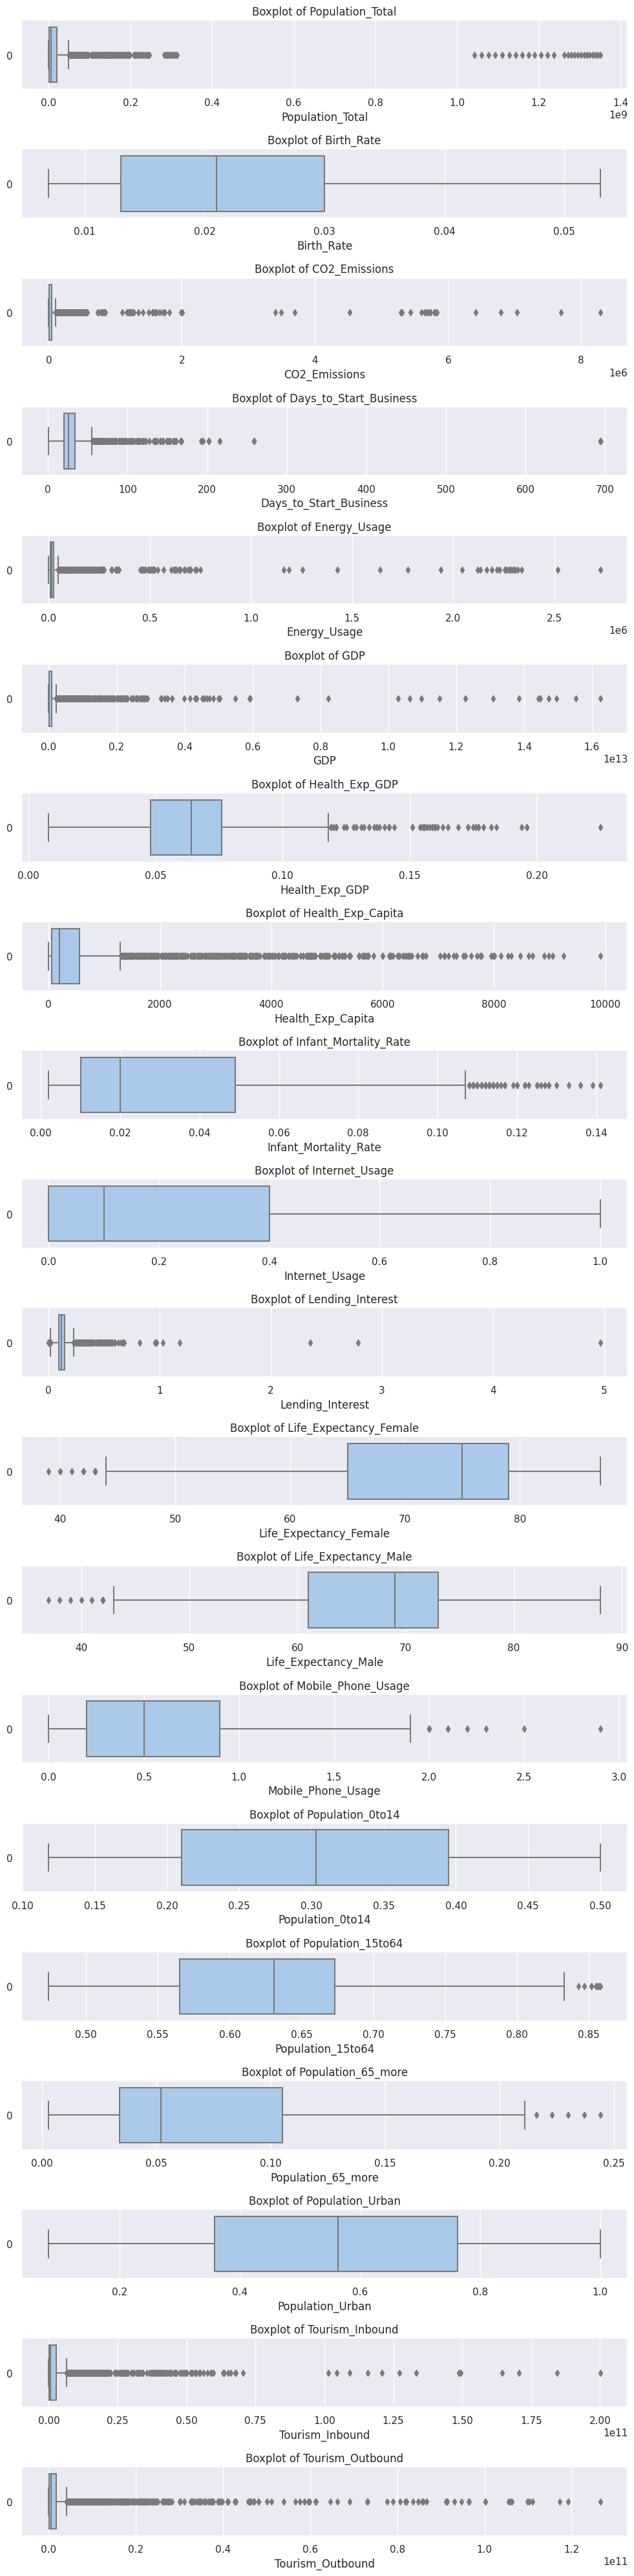

In [23]:
plt.figure(figsize=(10,40))
for i,cols in enumerate(visual,start=1):
    plt.subplot(20,1,i)
    sns.boxplot(visual[cols],orient='h',palette='pastel')
    plt.xlabel(cols)
    plt.title(f'Boxplot of {cols}')
plt.tight_layout()
plt.show()

In [24]:
## Outlier removal
Q1 = data_4.quantile(0.25)
Q3 = data_4.quantile(0.75)
IQR = Q3 - Q1

data_5 = data_4[~((data_4 < (Q1 - 1.5 * IQR)) | (data_4 > (Q3 + 1.5 * IQR))).any(axis=1)]

In [25]:
data_5.shape

(1357, 21)

<b><h2>2.Distribution Plot

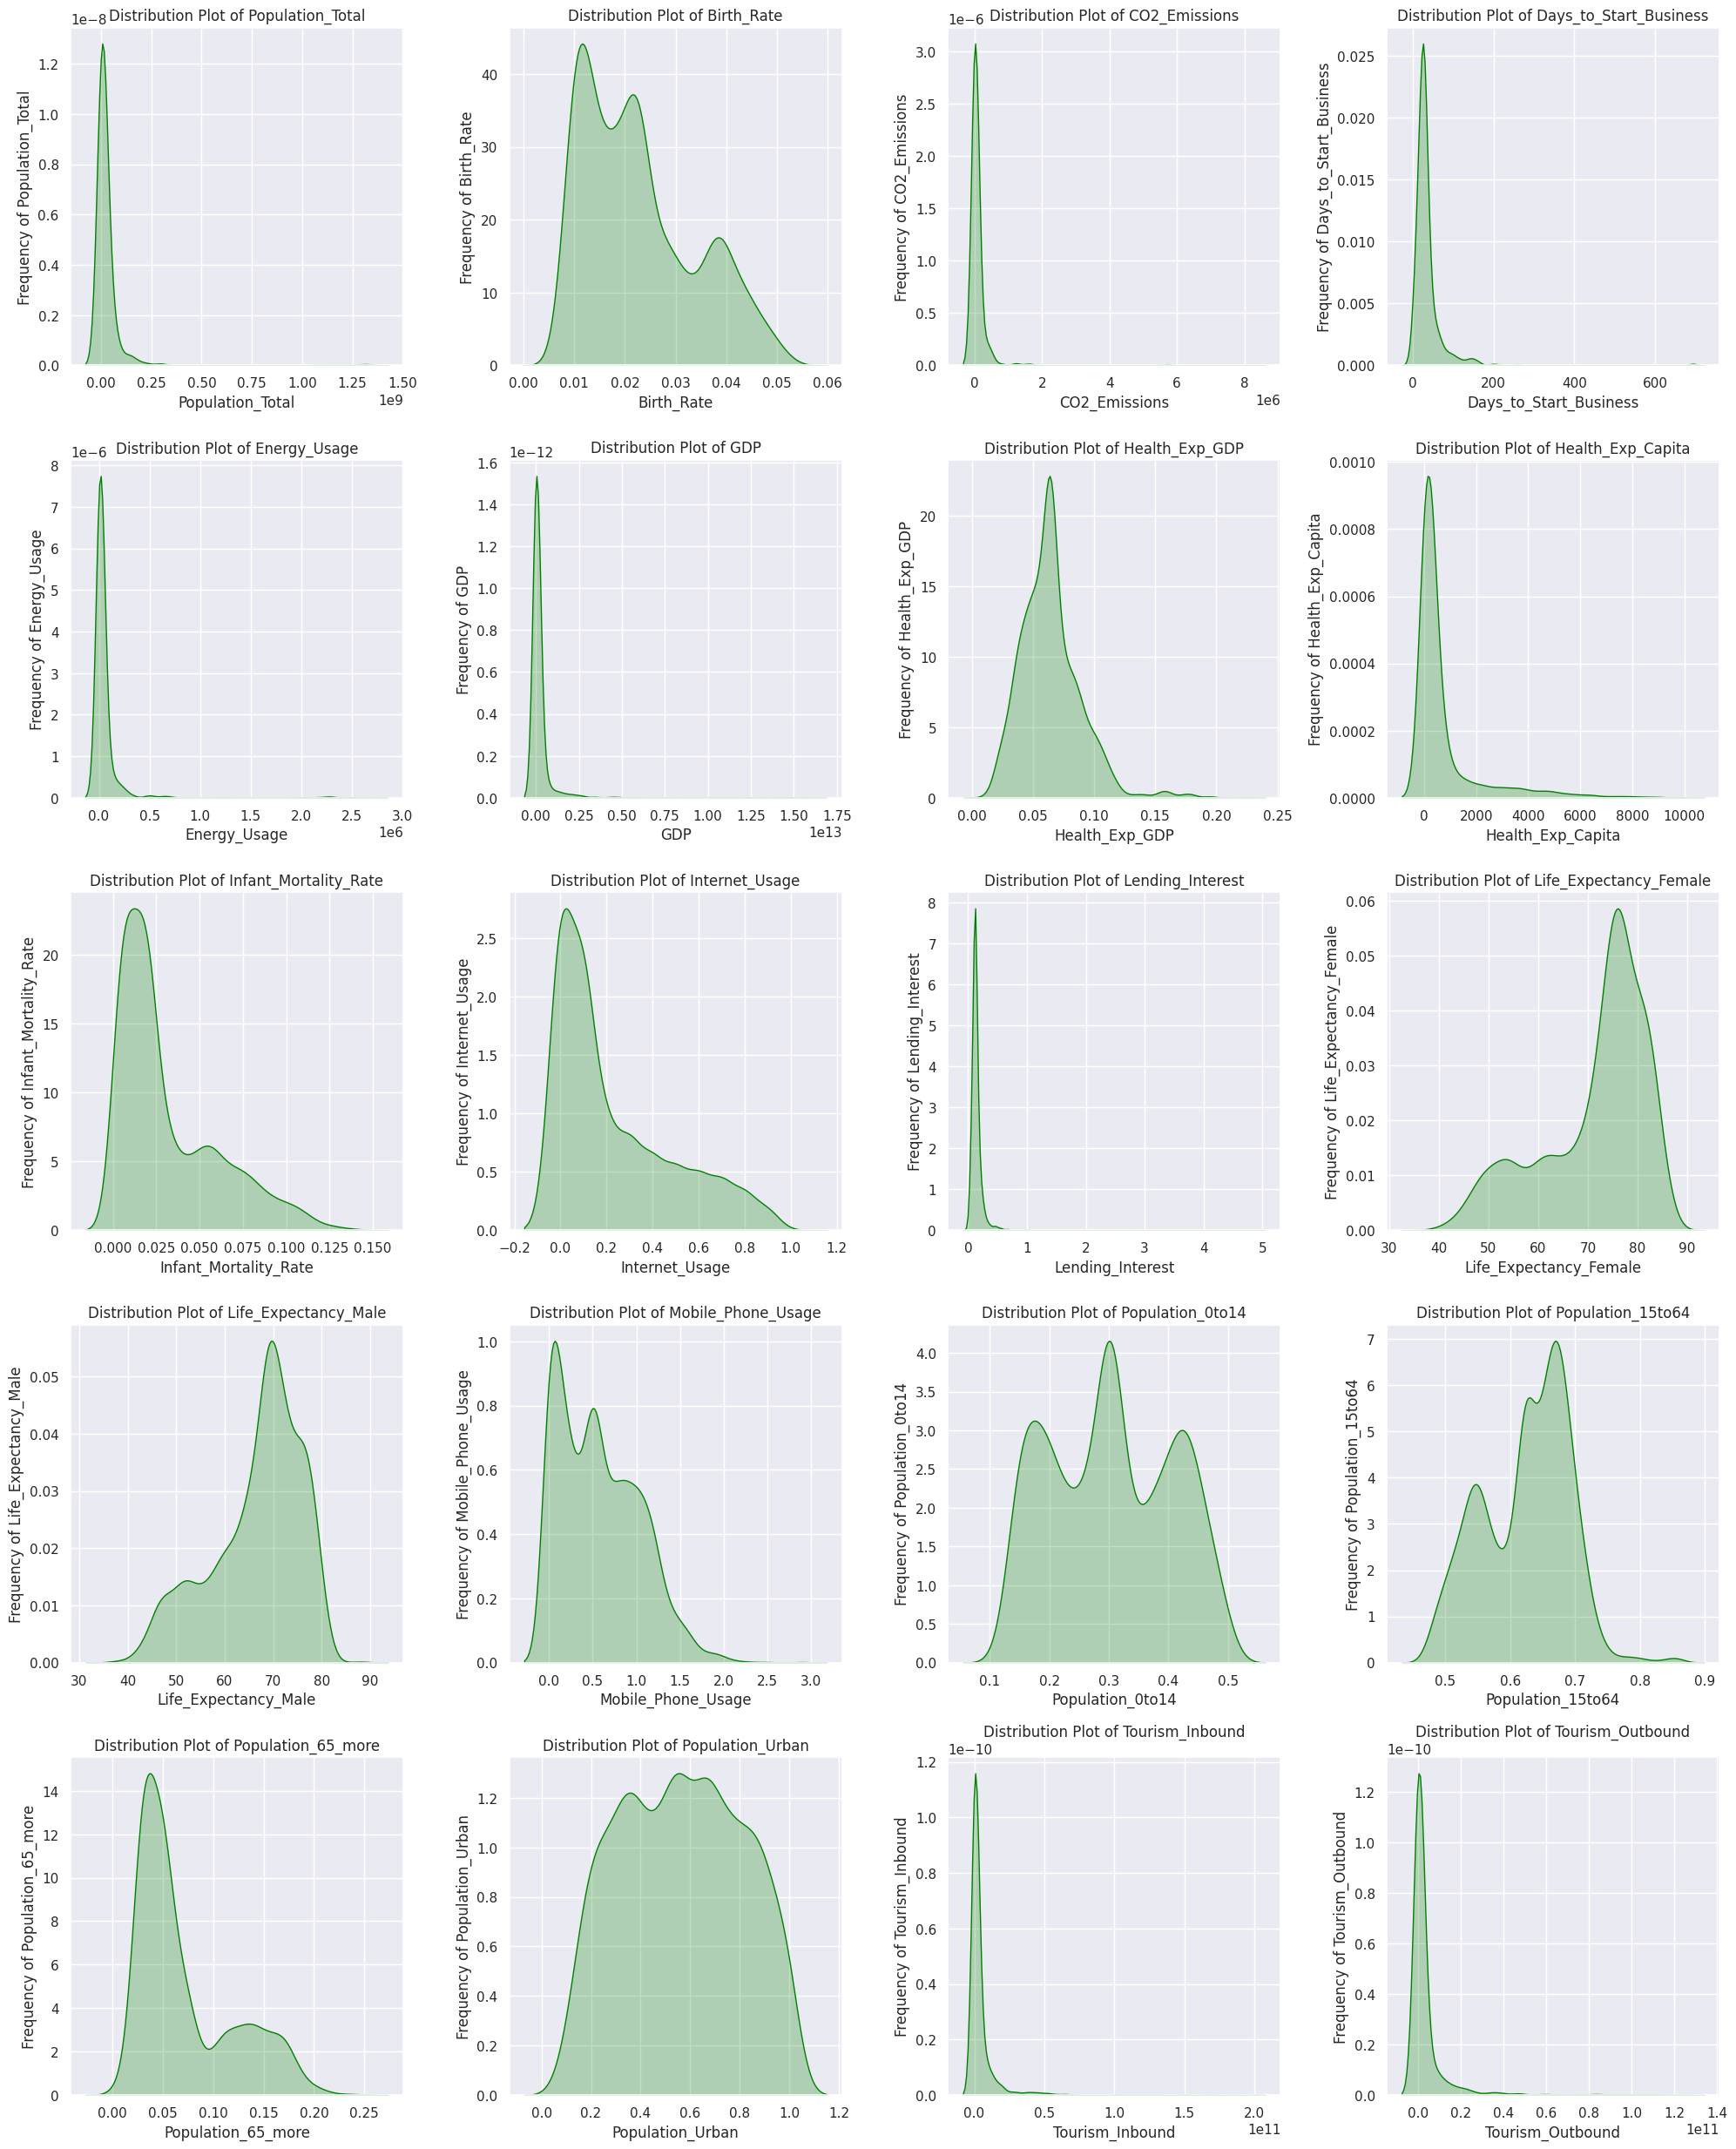

In [26]:
plt.figure(figsize=(20,25))

for i,cols in enumerate(visual,start=1):
    plt.subplot(5,4,i)
    sns.kdeplot(visual[cols],color='green',fill=True)
    plt.xlabel(cols)
    plt.ylabel(f'Frequency of {cols}')
    plt.title(f'Distribution Plot of {cols}')
plt.tight_layout()
plt.show()

<b><h2>3.Correlation Matrix

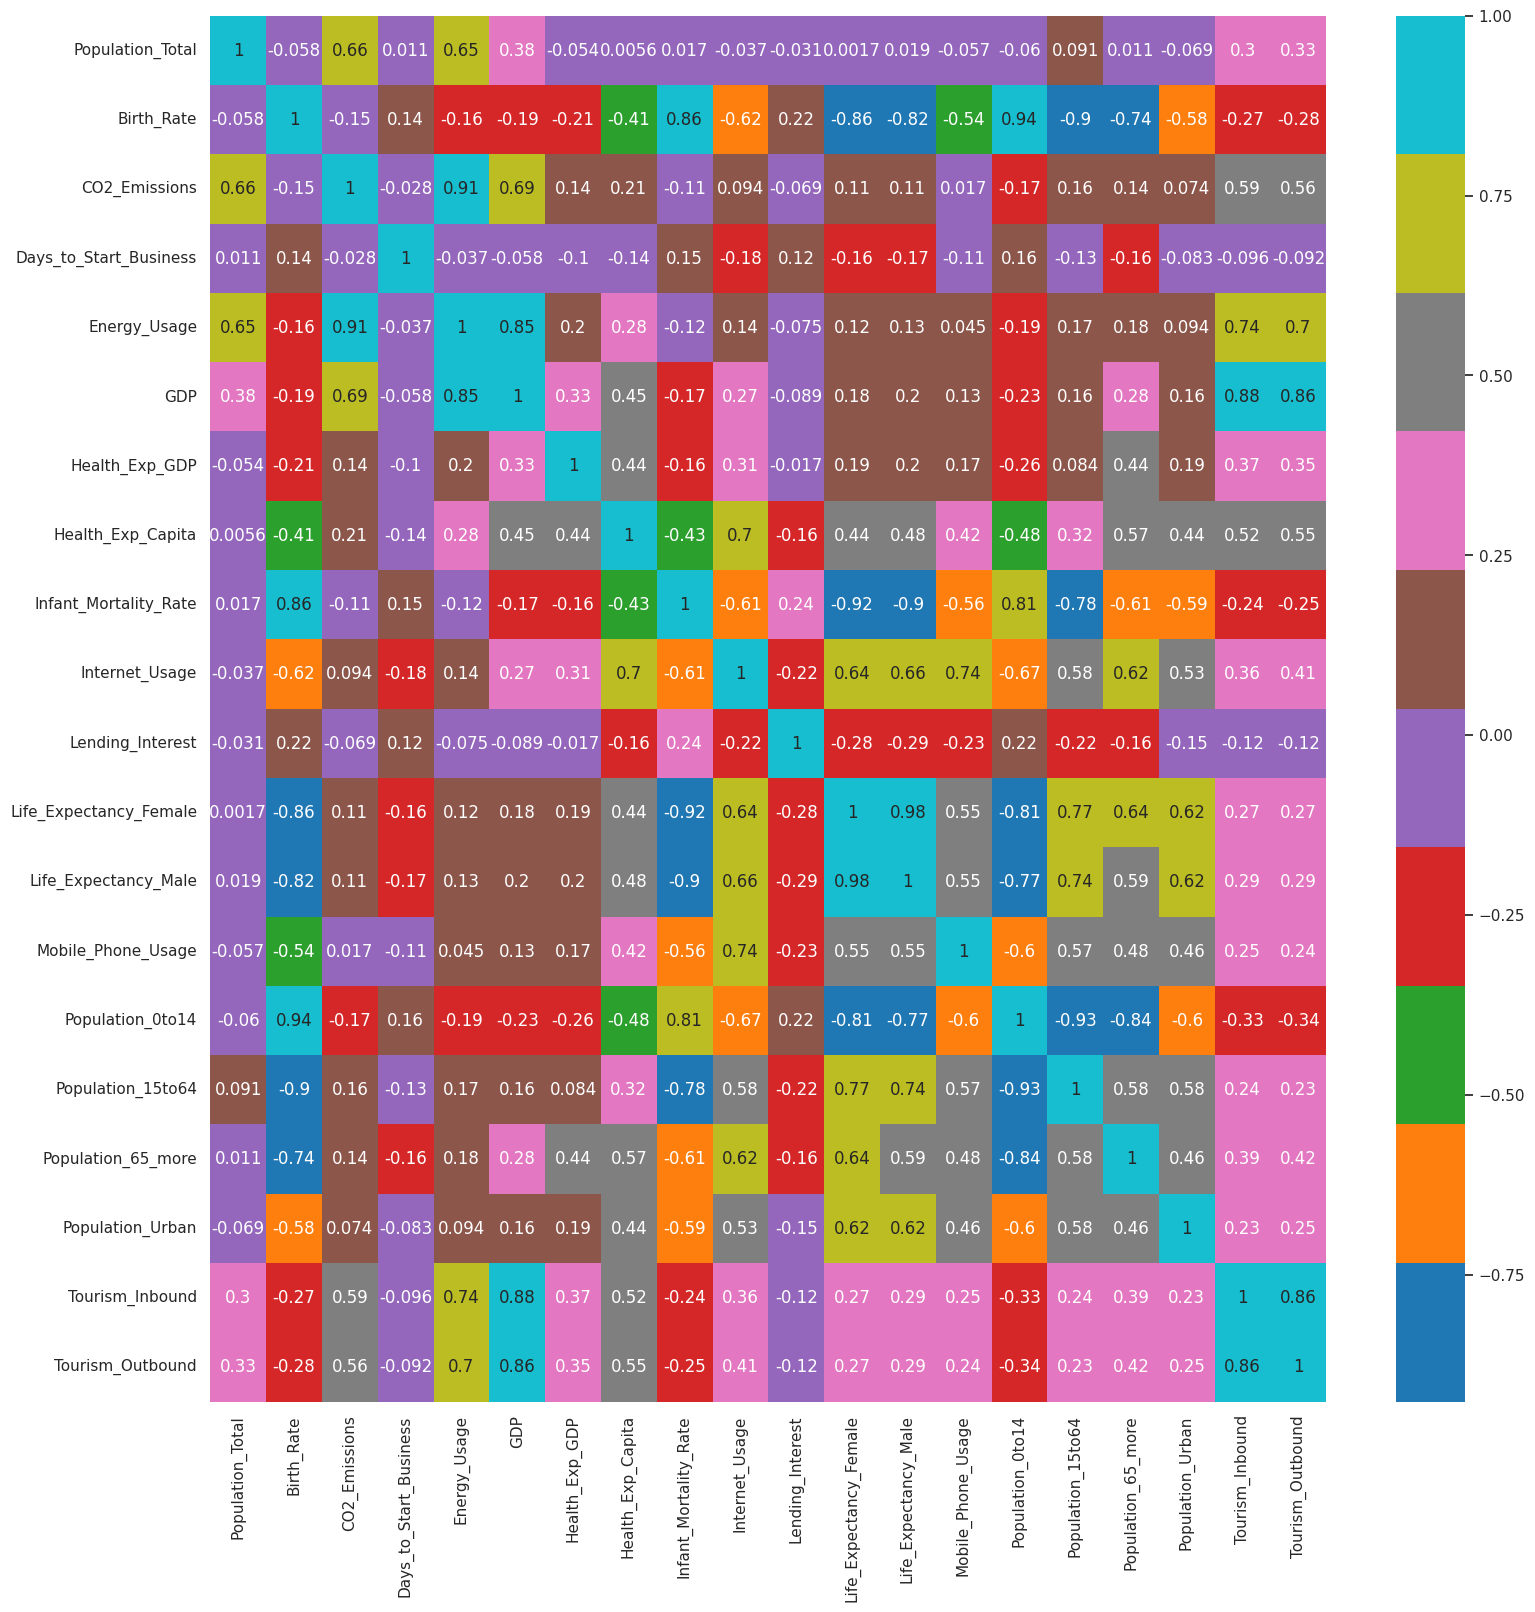

In [27]:
plt.figure(figsize=(18,18))
sns.heatmap(visual.corr(),annot=True,cmap='tab10')
plt.show()

<b>From Correlation Matrix:<br>
    
    1.Correlation between Birth rate and Infant Mortality rate, Birth rate and Popolation 0 to 14, GDP and Tourism Outbound is high.
    2.Correlation between Energy Usage and Co2 Emmision is also high, Energy usage and GDP are also correlated.
    3.GDP is also corelated with Touriam Inbound and Outbound.
    4.Tourism inbound and outbound are correlated vice versa.
    
<b>Since GDP is a important factor we can not drop it. Birth rate can be droped as it is correlated with two columns, simillarly Energy usage can be droped or we can also drop Population 0 to 14,Infant mortality rate and Co2 emmision.we can keep either one of Toursim inbound or outbound column

In [28]:
data_with_outliers= data_4.copy()

data_without_outliers= data_5.copy()

In [29]:
data_with_outliers.head()

Country  Population_Total  Birth_Rate  CO2_Emissions  \
0       Algeria          31719449       0.020        87931.0   
1        Angola          13924930       0.050         9542.0   
2         Benin           6949366       0.043         1617.0   
3      Botswana           1755375       0.027         4276.0   
4  Burkina Faso          11607944       0.046         1041.0   

   Days_to_Start_Business  Energy_Usage           GDP  Health_Exp_GDP  \
0                    26.0       26998.0  5.479006e+10           0.035   
1                    26.0        7499.0  9.129595e+09           0.034   
2                    26.0        1983.0  2.359122e+09           0.043   
3                    26.0        1836.0  5.788312e+09           0.047   
4                    26.0       14338.0  2.610959e+09           0.051   

   Health_Exp_Capita  Infant_Mortality_Rate  ...  Lending_Interest  \
0               60.0                  0.034  ...             0.100   
1               22.0                  0.128  ...             1.032   
2               15.0                  0.090  ...             0.120   
3              152.0                  0.054  ...             0.155   
4               12.0                  0.096  ...             0.120   

   Life_Expectancy_Female  Life_Expectancy_Male  Mobile_Phone_Usage  \
0                    71.0                  67.0                 0.0   
1                    47.0                  44.0                 0.0   
2                    57.0                  53.0                 0.0   
3                    52.0                  49.0                 0.1   
4                    52.0                  49.0                 0.0   

   Population_0to14  Population_15to64  Population_65_more  Population_Urban  \
0             0.342              0.619               0.039             0.599   
1             0.476              0.499               0.025             0.324   
2             0.454              0.517               0.029             0.383   
3             0.383              0.587               0.029             0.532   
4             0.468              0.505               0.028             0.178   

   Tourism_Inbound  Tourism_Outbound  
0      102000000.0       193000000.0  
1       34000000.0       146000000.0  
2       77000000.0        50000000.0  
3      227000000.0       209000000.0  
4       23000000.0        30000000.0  

[5 rows x 21 columns]

<b><h1>MODEL BUILDING

<b><h1>A. METHOD 1 (OUTLIERS PRESENT)

<b><h2> Scaling of the data (ROBUST SCALING)

RobustScaler is less sensitive to outliers because it relies on the median and the IQR, which are less influenced by extreme values.

In [30]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
scaled_data = scaler.fit_transform(data_with_outliers.iloc[:,1:])

<b><h2> APPLYING PCA

In [31]:
from sklearn.decomposition import PCA
pc = PCA()
pc_components = pc.fit_transform(scaled_data)

In [32]:
pc_components.shape

(2704, 20)

In [33]:
# The amount of variance that each PCA explains is
pc.explained_variance_

array([5.36525308e+02, 7.92918656e+01, 2.06891383e+01, 1.54499136e+01,
       1.06043180e+01, 7.55959481e+00, 6.29853242e+00, 5.22439071e+00,
       4.18113845e+00, 1.88527862e+00, 6.16887488e-01, 3.07698241e-01,
       2.44947353e-01, 1.91856936e-01, 1.11938286e-01, 7.83560452e-02,
       4.88439264e-02, 2.35259165e-02, 9.10101074e-03, 4.74829911e-04])

In [34]:
# in percentage - The amount of variance that each PCA explains is
var = pc.explained_variance_ratio_
var

array([7.78313878e-01, 1.15025253e-01, 3.00128311e-02, 2.24125162e-02,
       1.53832218e-02, 1.09663747e-02, 9.13700644e-03, 7.57879587e-03,
       6.06539529e-03, 2.73489152e-03, 8.94891789e-04, 4.46364426e-04,
       3.55334448e-04, 2.78318494e-04, 1.62383992e-04, 1.13667699e-04,
       7.08557549e-05, 3.41280215e-05, 1.32024396e-05, 6.88815054e-07])

In [35]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 77.83,  89.33,  92.33,  94.57,  96.11,  97.21,  98.12,  98.88,
        99.49,  99.76,  99.85,  99.89,  99.93,  99.96,  99.98,  99.99,
       100.  , 100.  , 100.  , 100.  ])

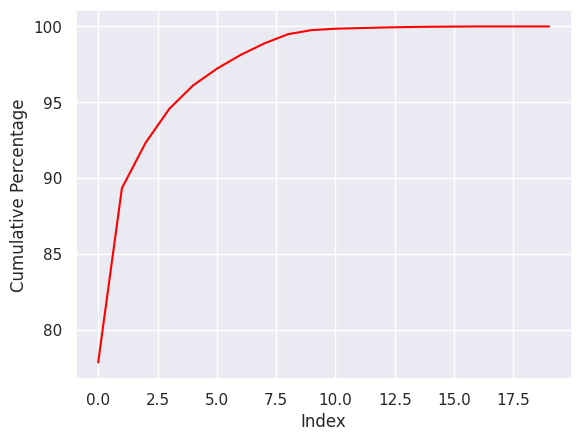

In [36]:
# Variance plot for PCA components obtained
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

In [37]:
data_pca=pc_components[:,:20]

<b><h2>1.K-MEANS

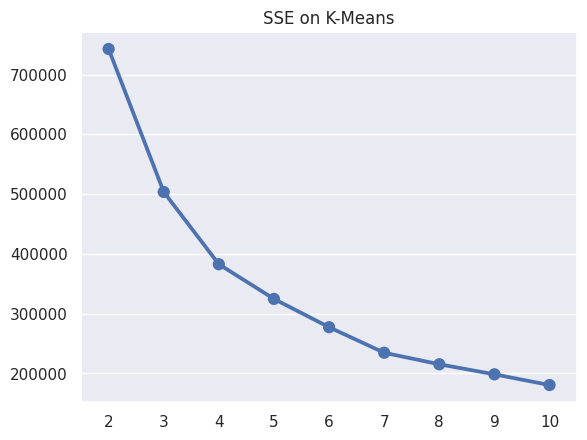

In [38]:
from sklearn.cluster import KMeans

np.random.seed(42)
inertia = []
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(data_pca)
    inertia.append(model.inertia_)

sns.pointplot(x=list(range(2, 11)), y=inertia)
plt.title('SSE on K-Means')
plt.show()

In [39]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(data_pca)

In [40]:
np.unique(y_kmeans)

array([0, 1, 2, 3, 4], dtype=int32)

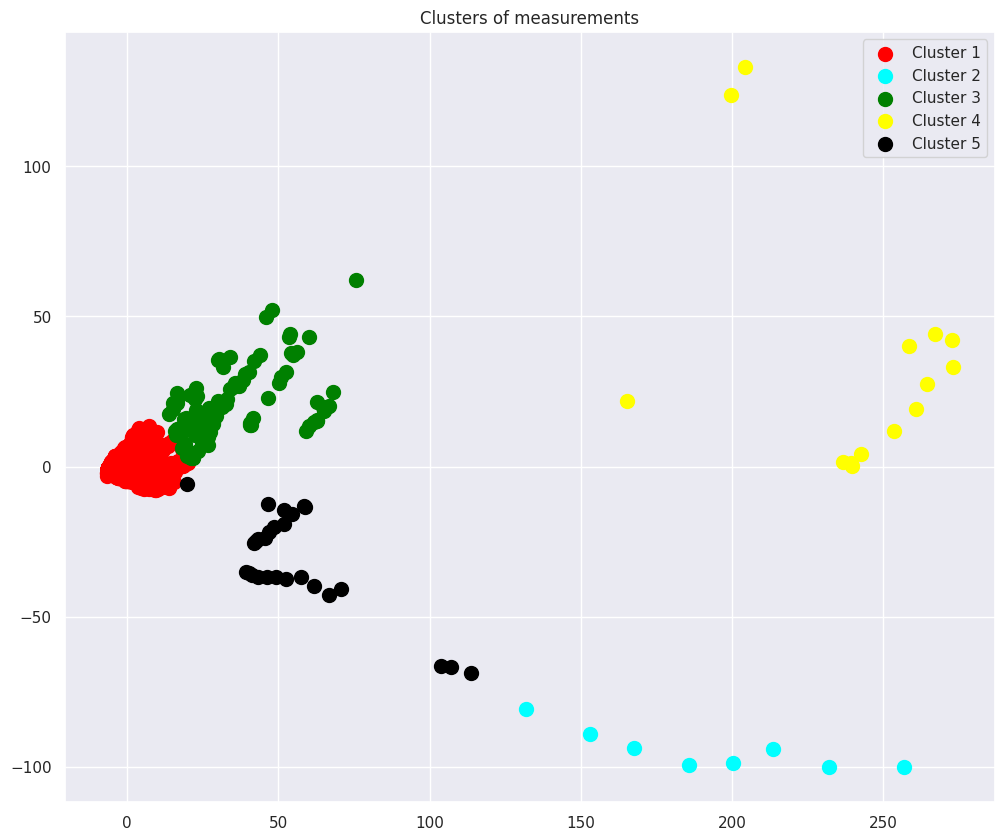

In [41]:
plt.figure(figsize=(12,10))

plt.scatter(data_pca[y_kmeans == 0, 0], data_pca[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_kmeans == 1, 0], data_pca[y_kmeans == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(data_pca[y_kmeans == 2, 0], data_pca[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_kmeans == 3, 0], data_pca[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(data_pca[y_kmeans == 4, 0], data_pca[y_kmeans == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [42]:
from sklearn.metrics import silhouette_score as sil

sil_KMeans=(sil(data_pca, y_kmeans))
sil_KMeans

0.8038354063227509

<b><h2>2.Hierarchical Clustering

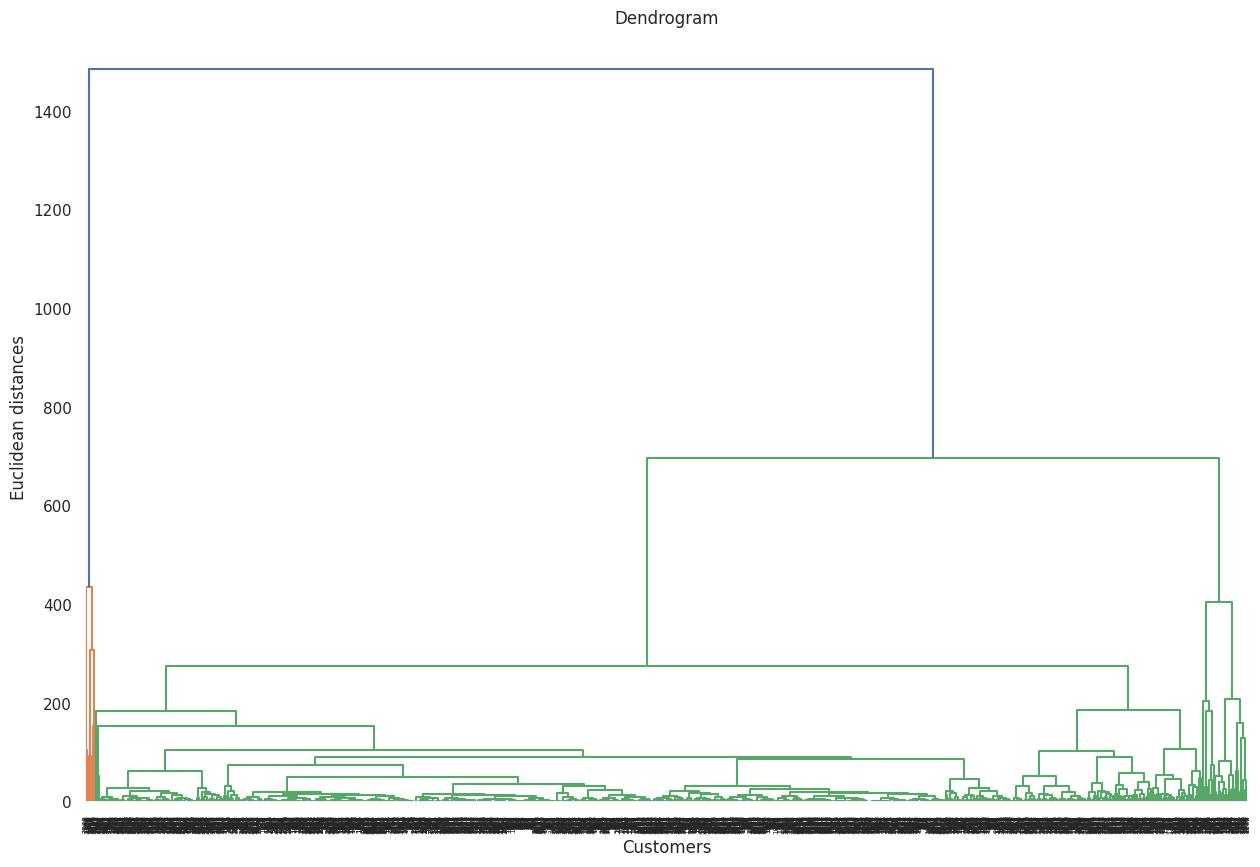

In [43]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))

dendrogram = sch.dendrogram(sch.linkage(data_pca, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [44]:
from sklearn.cluster import AgglomerativeClustering

hc = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(data_pca)

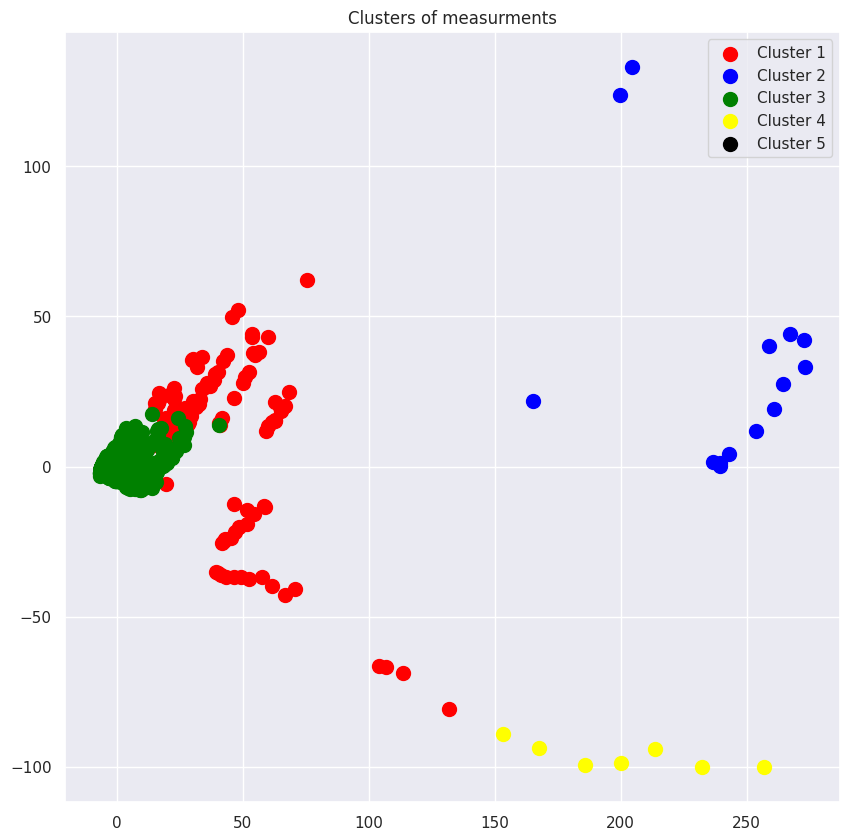

In [45]:
plt.figure(figsize=(10,10))

plt.scatter(data_pca[y_hc == 0, 0], data_pca[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca[y_hc == 1, 0], data_pca[y_hc == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_pca[y_hc == 2, 0], data_pca[y_hc == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca[y_hc == 3, 0], data_pca[y_hc == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(data_pca[y_hc == 4, 0], data_pca[y_hc == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [46]:
from sklearn.metrics import silhouette_score as sil

sil_HC=(sil(data_pca, y_hc))
sil_HC

0.8248153420005929

<b><h2>3. DBSCAN

In [47]:
from sklearn.cluster import DBSCAN

eps = 5
min_samples = 5
dbscan = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels = dbscan.fit_predict(data_pca)

In [48]:
dbscan_labels

array([ 0, -1,  0, ...,  0,  4,  0])

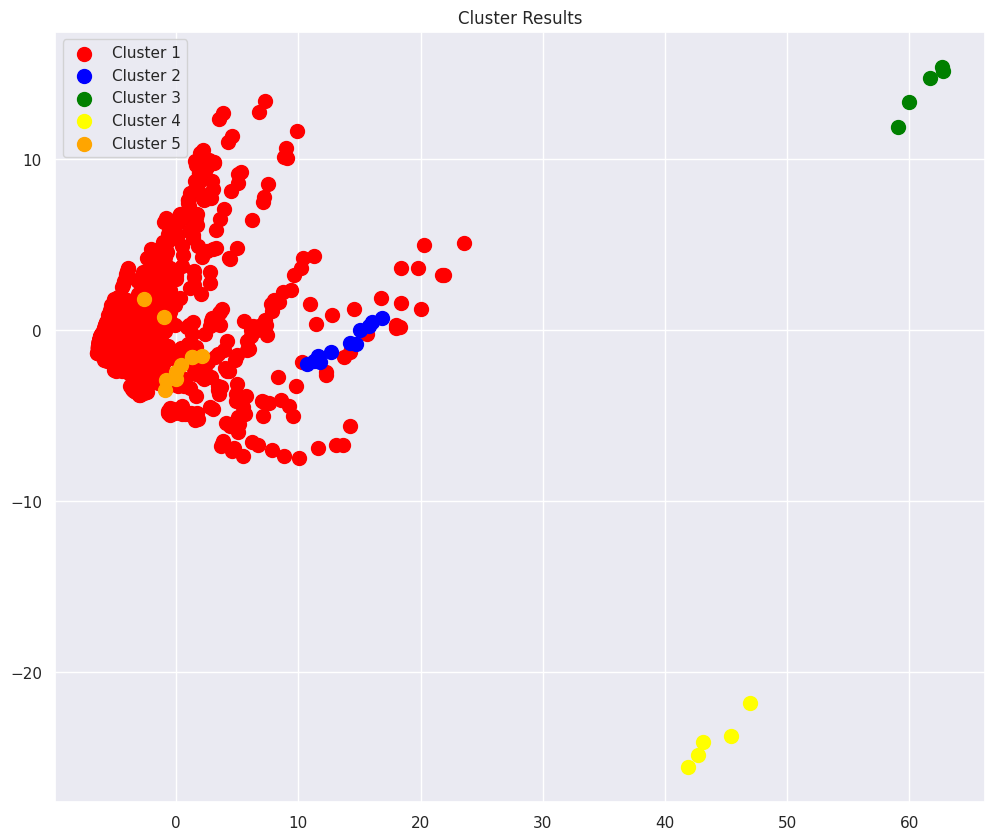

In [49]:
plt.figure(figsize=(12,10))

plt.scatter(data_pca[dbscan_labels== 0,0], data_pca[dbscan_labels== 0,1], s=100, c='red', label = 'Cluster 1')
plt.scatter(data_pca[dbscan_labels== 1,0], data_pca[dbscan_labels== 1,1], s=100, c= 'blue', label = 'Cluster 2')
plt.scatter(data_pca[dbscan_labels== 2,0], data_pca[dbscan_labels== 2,1], s=100, c= 'green', label = 'Cluster 3')
plt.scatter(data_pca[dbscan_labels== 3,0], data_pca[dbscan_labels== 3,1], s=100, c= 'yellow', label = 'Cluster 4')
plt.scatter(data_pca[dbscan_labels== 4,0], data_pca[dbscan_labels== 4,1], s=100, c= 'orange', label = 'Cluster 5')

plt.title("Cluster Results")
plt.legend()
plt.show()

In [50]:
from sklearn.metrics import silhouette_score as sil

sil_DBSCAN=(sil(data_pca, dbscan_labels))
sil_DBSCAN

0.2957974306539001

<b><h1> METHOD 2- (WITHOUT OUTLIERS)

<b><h2> Scaling of the data (MinMax SCALER)

In [51]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scale_data = scaler.fit_transform(data_without_outliers.iloc[:,1:])

<b><h2> APPLYING PCA

In [52]:
pc = PCA()
pc_components = pc.fit_transform(scale_data)

In [53]:
pc_components.shape

(1357, 20)

In [54]:
var = pc.explained_variance_ratio_
var

array([4.96508506e-01, 9.34159971e-02, 7.31824627e-02, 5.70526670e-02,
       5.25981212e-02, 4.23514820e-02, 3.20813028e-02, 3.01683381e-02,
       2.44066676e-02, 2.02557150e-02, 1.72739966e-02, 1.47664841e-02,
       1.21432441e-02, 1.10119644e-02, 7.97460549e-03, 5.56739748e-03,
       4.61868759e-03, 3.49603588e-03, 9.89867597e-04, 1.36456941e-04])

In [55]:
# Cumulative variance
var1 = np.cumsum(np.round(var,decimals=4)*100)
var1

array([ 49.65,  58.99,  66.31,  72.02,  77.28,  81.52,  84.73,  87.75,
        90.19,  92.22,  93.95,  95.43,  96.64,  97.74,  98.54,  99.1 ,
        99.56,  99.91, 100.01, 100.02])

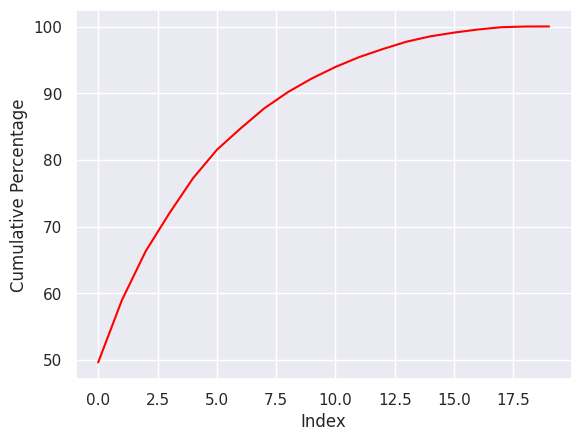

In [56]:
plt.plot(var1,color='red')
plt.xlabel('Index')
plt.ylabel('Cumulative Percentage')
plt.show()

In [57]:
data_pca2 = pc_components[:,:20]

<b><h1>A. METHOD 2 (WITHOUT OUTLIERS)

<b><h2>1.K-MEANS

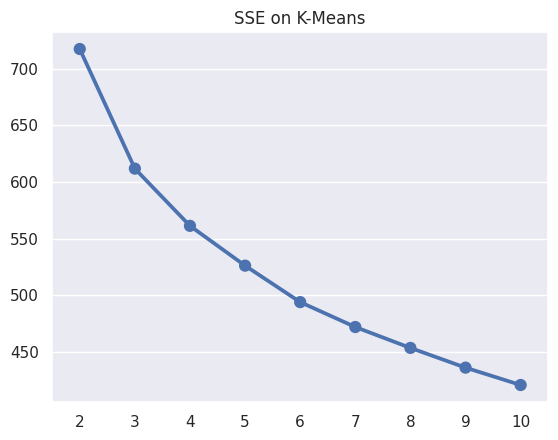

In [58]:
from sklearn.cluster import KMeans

np.random.seed(42)
inertia = []
for i in range(2, 11):
    model = KMeans(n_clusters=i)
    model.fit(data_pca2)
    inertia.append(model.inertia_)

sns.pointplot(x=list(range(2, 11)), y=inertia)
plt.title('SSE on K-Means')
plt.show()

In [59]:
kmeans2 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans2 = kmeans2.fit_predict(data_pca2)

In [60]:
np.unique(y_kmeans2)

array([0, 1, 2, 3, 4], dtype=int32)

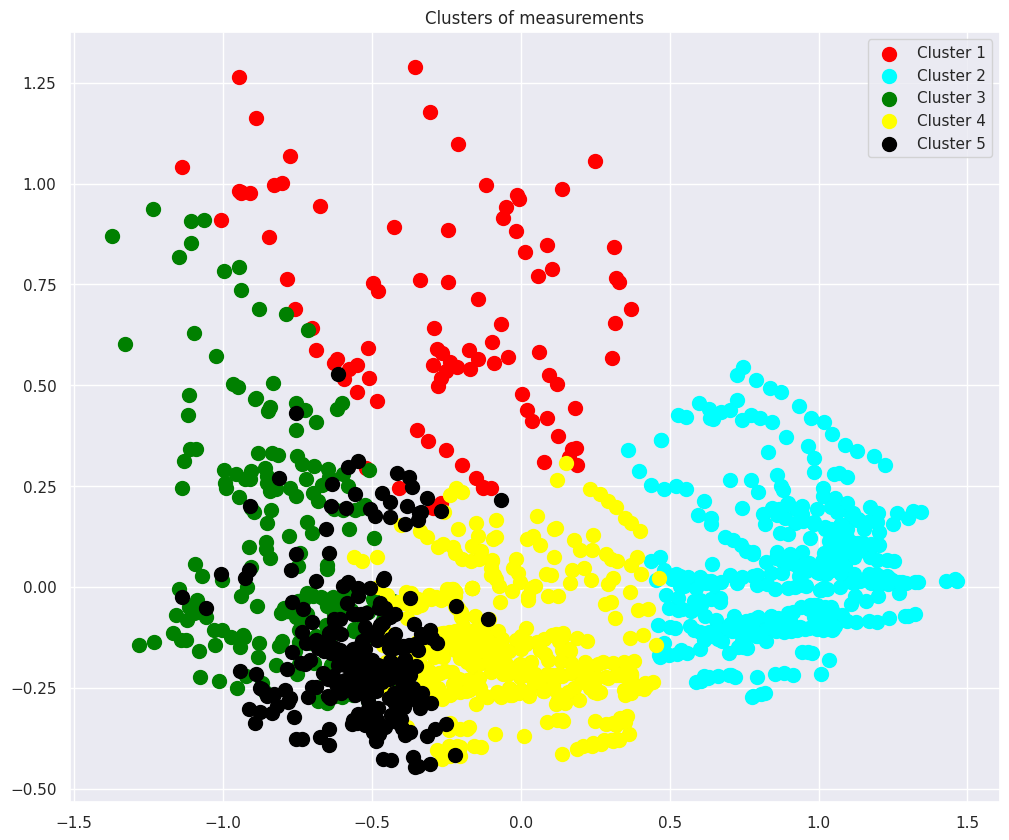

In [61]:
plt.figure(figsize=(12,10))

plt.scatter(data_pca2[y_kmeans2 == 0, 0], data_pca2[y_kmeans2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_kmeans2 == 1, 0], data_pca2[y_kmeans2 == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(data_pca2[y_kmeans2 == 2, 0], data_pca2[y_kmeans2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca2[y_kmeans2 == 3, 0], data_pca2[y_kmeans2 == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')
plt.scatter(data_pca2[y_kmeans2 == 4, 0], data_pca2[y_kmeans2 == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.title('Clusters of measurements')
plt.legend()
plt.show()

In [62]:
from sklearn.metrics import silhouette_score as sil

sil_KMeans2=(sil(data_pca2, y_kmeans2))
sil_KMeans2

0.21812564859535555

<b><h2>2.Hierarchical Clustering

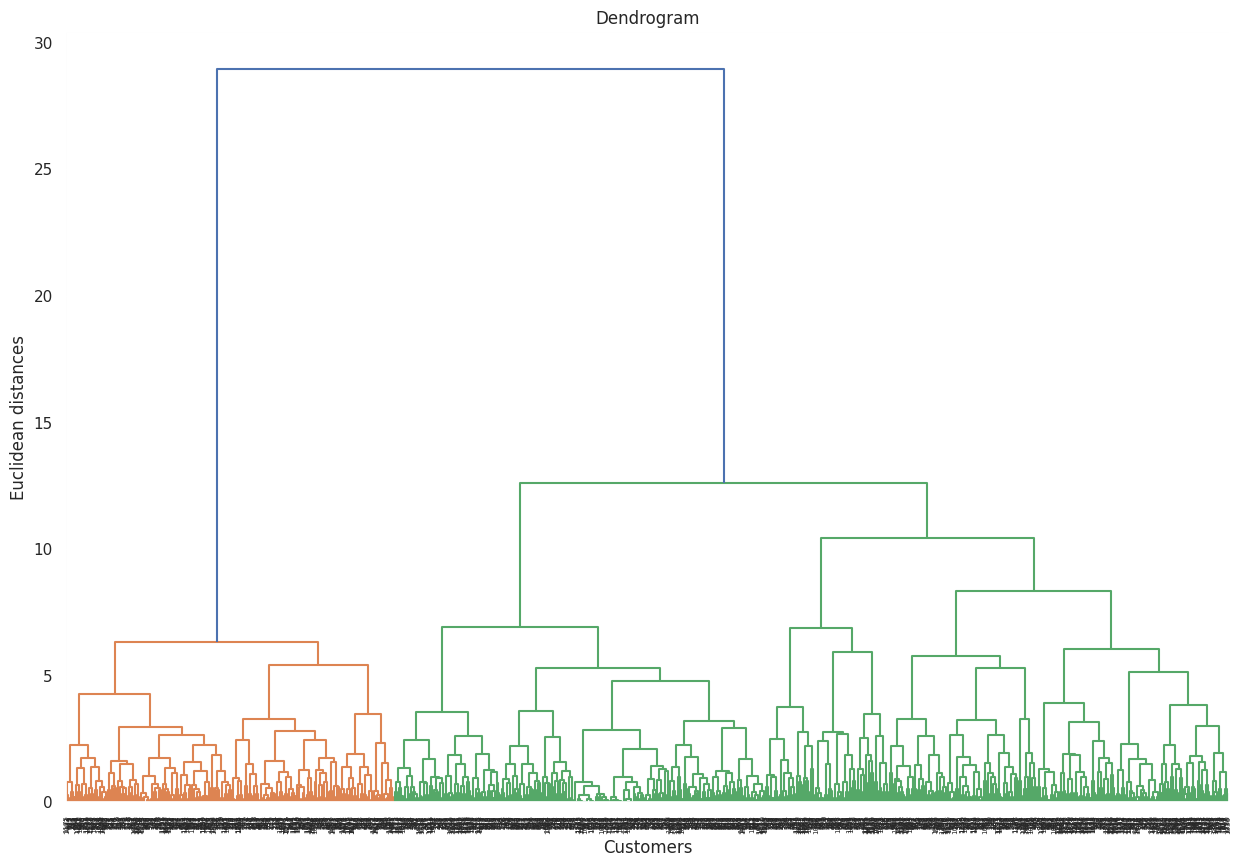

In [63]:
import scipy.cluster.hierarchy as sch

plt.figure(figsize=(15,10))

dendrogram = sch.dendrogram(sch.linkage(data_pca2, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [64]:
from sklearn.cluster import AgglomerativeClustering

hc2 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc2 = hc2.fit_predict(data_pca2)

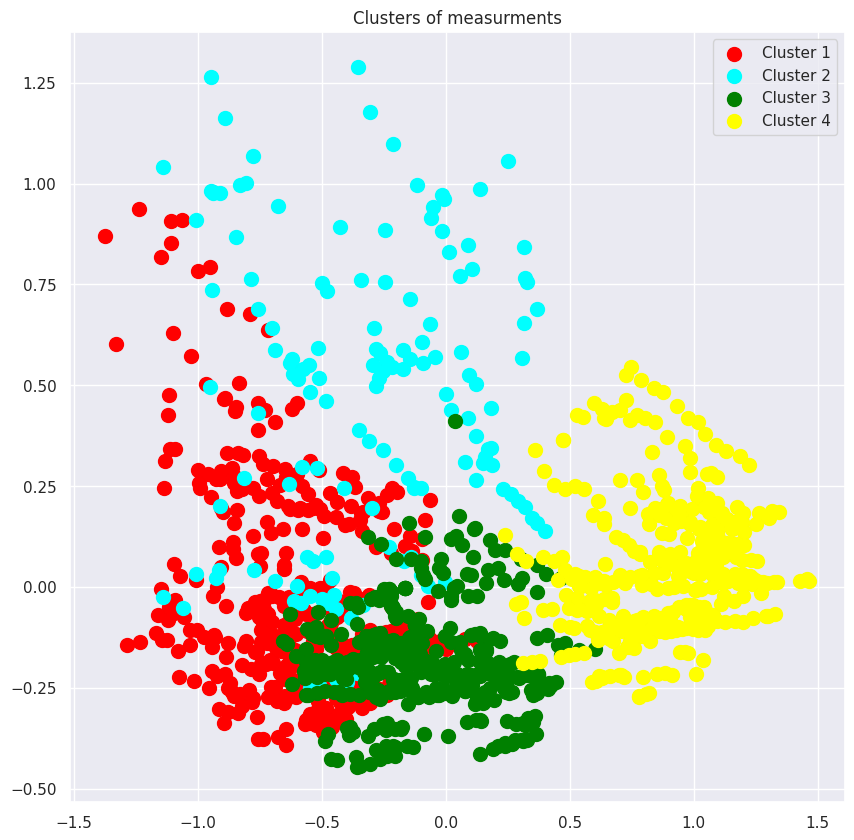

In [65]:
plt.figure(figsize=(10,10))

plt.scatter(data_pca2[y_hc2 == 0, 0], data_pca2[y_hc2 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_pca2[y_hc2 == 1, 0], data_pca2[y_hc2 == 1, 1], s = 100, c = 'cyan', label = 'Cluster 2')
plt.scatter(data_pca2[y_hc2 == 2, 0], data_pca2[y_hc2 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_pca2[y_hc2 == 3, 0], data_pca2[y_hc2 == 3, 1], s = 100, c = 'yellow', label = 'Cluster 4')

plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [66]:
from sklearn.metrics import silhouette_score as sil

sil_HC2=(sil(data_pca2, y_hc2))
sil_HC2

0.19269747213609062

<b><h2>3. DBSCAN

In [67]:
from sklearn.cluster import DBSCAN

eps = 0.5
min_samples = 5
dbscan2 = DBSCAN(eps=eps, min_samples=min_samples)

# Fit the data to obtain clustering labels
dbscan_labels2 = dbscan2.fit_predict(data_pca2)

In [68]:
dbscan_labels2

array([0, 1, 1, ..., 4, 1, 1])

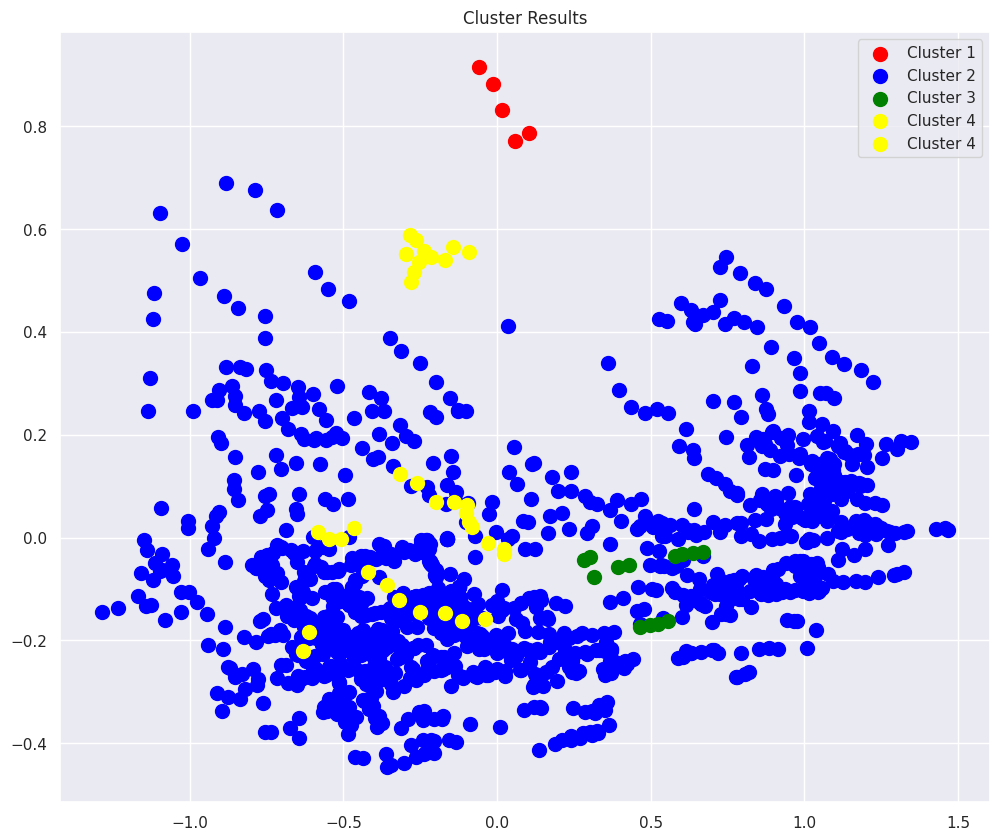

In [69]:
plt.figure(figsize=(12,10))

plt.scatter(data_pca2[dbscan_labels2== 0,0], data_pca2[dbscan_labels2== 0,1], s=100, c='red', label = 'Cluster 1')
plt.scatter(data_pca2[dbscan_labels2== 1,0], data_pca2[dbscan_labels2== 1,1], s=100, c= 'blue', label = 'Cluster 2')
plt.scatter(data_pca2[dbscan_labels2== 2,0], data_pca2[dbscan_labels2== 2,1], s=100, c= 'green', label = 'Cluster 3')
plt.scatter(data_pca2[dbscan_labels2== 3,0], data_pca2[dbscan_labels2== 3,1], s=100, c= 'yellow', label = 'Cluster 4')
plt.scatter(data_pca2[dbscan_labels2== 4,0], data_pca2[dbscan_labels2== 4,1], s=100, c= 'yellow', label = 'Cluster 4')

plt.title("Cluster Results")
plt.legend()
plt.show()

In [70]:
from sklearn.metrics import silhouette_score as sil

sil_DBSCAN2=(sil(data_pca2, dbscan_labels2))
sil_DBSCAN2

-0.15614544124360802

<b><h1> METHOD 3 (t-SNE)

In [71]:
from sklearn.manifold import TSNE

# Initialize t-SNE with default parameters
tsne = TSNE()

# Fit and transform the data to 2 dimensions
data_tsne = tsne.fit_transform(data_with_outliers.iloc[:,1:])

In [72]:
data_tsne.shape

(2704, 2)

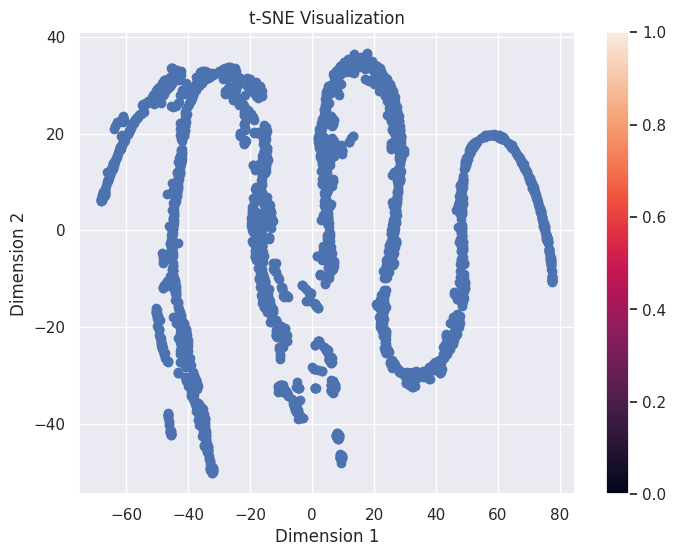

In [73]:
# Create a 2D scatter plot to visualize the t-SNE results
plt.figure(figsize=(8, 6))
plt.scatter(data_tsne[:, 0], data_tsne[:, 1])
plt.title("t-SNE Visualization")
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.colorbar()
plt.show()

<b><h2>1. K-Means

In [74]:
kmeans3 = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans3 = kmeans3.fit_predict(data_tsne)

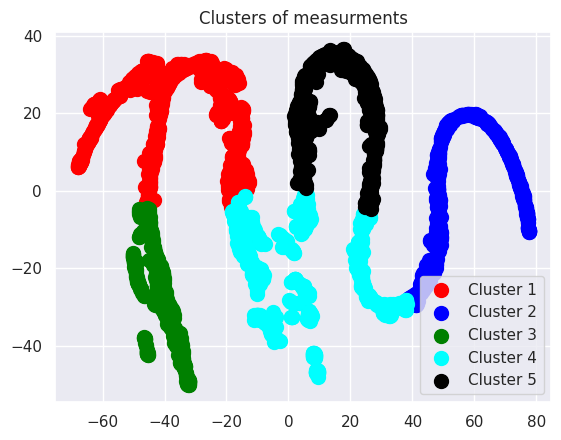

In [75]:
plt.scatter(data_tsne[y_kmeans3 == 0, 0], data_tsne[y_kmeans3 == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(data_tsne[y_kmeans3 == 1, 0], data_tsne[y_kmeans3 == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(data_tsne[y_kmeans3 == 2, 0], data_tsne[y_kmeans3 == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(data_tsne[y_kmeans3 == 3, 0], data_tsne[y_kmeans3 == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(data_tsne[y_kmeans3 == 4, 0], data_tsne[y_kmeans3 == 4, 1], s = 100, c = 'black', label = 'Cluster 5')
plt.title('Clusters of measurments')
plt.legend()
plt.show()

In [76]:
from sklearn.metrics import silhouette_score as sil

sil_KMeans3=(sil(data_tsne, y_kmeans3))
sil_KMeans3

0.44592014

<b><h2>2.Hierarchical Clustering

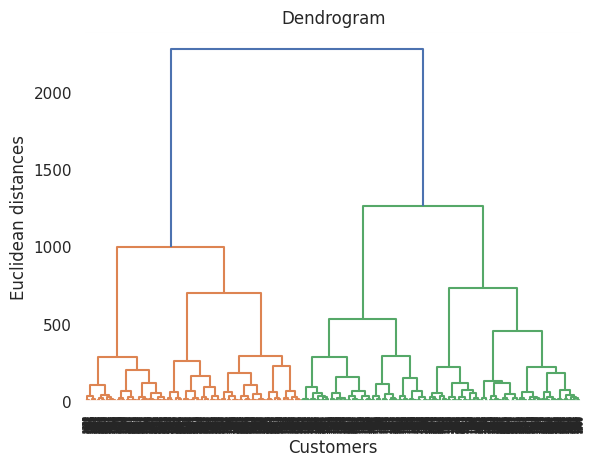

In [77]:
dendrogram = sch.dendrogram(sch.linkage(data_tsne, method = 'ward'))

plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean distances')
plt.show()

In [78]:
from sklearn.cluster import AgglomerativeClustering

hc3 = AgglomerativeClustering(n_clusters = 4, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(data_tsne)

In [79]:
from sklearn.metrics import silhouette_score as sil

sil_HC3=(sil(data_tsne, y_hc3))
sil_HC3

0.40406957

In [80]:
score = pd.DataFrame({'Method':['M1 K-Means','M1 Hierarchy','M1 DBSCAN','M2 K-Means','M2 Hierarchy','M2 DBSCAN','M3 K-Means','M3 Hierarchy'],
                   'Silhouette Score':[sil_KMeans, sil_HC, sil_DBSCAN, sil_KMeans2, sil_HC2 , sil_DBSCAN2, sil_KMeans3, sil_HC3]})
score

Method  Silhouette Score
0    M1 K-Means          0.803835
1  M1 Hierarchy          0.824815
2     M1 DBSCAN          0.295797
3    M2 K-Means          0.218126
4  M2 Hierarchy          0.192697
5     M2 DBSCAN         -0.156145
6    M3 K-Means          0.445920
7  M3 Hierarchy          0.404070

<b>From above table, we can see that the K-Means and Hierarchical Clustering in method 1 (Containg Outliers) gives a better result.<br>
    

In [81]:
df=pd.DataFrame(y_kmeans, columns=['Cluster_Labels'])


In [82]:
final_df=pd.concat([data_with_outliers, df], axis=1)
final_df.tail()

Country  Population_Total  Birth_Rate  CO2_Emissions  \
2699  Turks and Caicos Islands             32427    0.022715         8529.0   
2700             United States         313873685    0.013000         8529.0   
2701                   Uruguay           3395253    0.015000         8529.0   
2702             Venezuela, RB          29954782    0.020000         8529.0   
2703     Virgin Islands (U.S.)            105275    0.011000         8529.0   

      Days_to_Start_Business  Energy_Usage           GDP  Health_Exp_GDP  \
2699                    26.0       14338.0  1.507975e+10         0.06417   
2700                     5.0     2132446.0  1.624460e+13         0.17900   
2701                     7.0       14338.0  5.000435e+10         0.08900   
2702                   144.0       14338.0  3.812862e+11         0.04600   
2703                    26.0       14338.0  1.507975e+10         0.06417   

      Health_Exp_Capita  Infant_Mortality_Rate  ...  Life_Expectancy_Female  \
2699              193.0                  0.020  ...                    75.0   
2700             8895.0                  0.006  ...                    81.0   
2701             1308.0                  0.010  ...                    80.0   
2702              593.0                  0.013  ...                    78.0   
2703              193.0                  0.020  ...                    83.0   

      Life_Expectancy_Male  Mobile_Phone_Usage  Population_0to14  \
2699                  69.0                 0.5          0.303051   
2700                  76.0                 1.0          0.196000   
2701                  74.0                 1.5          0.220000   
2702                  72.0                 1.0          0.288000   
2703                  76.0                 0.5          0.206000   

      Population_15to64  Population_65_more  Population_Urban  \
2699           0.623481               0.052             0.911   
2700           0.667000               0.136             0.811   
2701           0.639000               0.140             0.948   
2702           0.652000               0.060             0.889   
2703           0.641000               0.152             0.949   

      Tourism_Inbound  Tourism_Outbound  Cluster_Labels  
2699     6.885000e+08      4.560000e+08               0  
2700     2.000920e+11      1.265730e+11               3  
2701     2.222000e+09      1.028000e+09               0  
2702     9.040000e+08      3.202000e+09               0  
2703     6.885000e+08      4.560000e+08               0  

[5 rows x 22 columns]

<b><h1> MODEL EVALUATION

**Splitting the data into dependent and indepent variables.**

In [83]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import recall_score, f1_score,precision_score
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.model_selection import cross_val_score

In [84]:
x=final_df.iloc[:,1:21]
y=final_df['Cluster_Labels']

In [85]:
from sklearn.model_selection import train_test_split

x_train,x_test, y_train,y_test=train_test_split(x,y, test_size=0.3, random_state=40)

<b><h2> 1. LOGISTIC REGRESSION

In [86]:
from sklearn.linear_model import LogisticRegression

In [87]:
LR_model=LogisticRegression(random_state=42)
LR_model.fit(x_train,y_train)

LogisticRegression(random_state=42)

**Logistic Regression model on training dataset**

In [88]:
train_ypred1=LR_model.predict(x_train)
print("Training Data Result: ")
print("Classification Report: \n",classification_report(y_train, train_ypred1))
print('-'*70)
score1= metrics.accuracy_score(y_train, train_ypred1)
print('Accuracy: ',score1)
print('-'*70)
print('confusion matrix: \n',confusion_matrix(y_train, train_ypred1))

Training Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.76      0.85      1791
           1       0.00      0.00      0.00         4
           2       0.09      0.49      0.15        68
           3       0.07      0.75      0.12         8
           4       0.00      0.00      0.00        21

    accuracy                           0.74      1892
   macro avg       0.23      0.40      0.22      1892
weighted avg       0.93      0.74      0.81      1892

----------------------------------------------------------------------
Accuracy:  0.7389006342494715
----------------------------------------------------------------------
confusion matrix: 
 [[1359   16  330   80    6]
 [   0    0    4    0    0]
 [  30    0   33    2    3]
 [   0    0    2    6    0]
 [   0    0   17    4    0]]


**Logistic Regression model on testing dataset**

In [89]:
test_ypred1=LR_model.predict(x_test)
print("Testing Data Result: ")
print("Classification Report: \n",classification_report(y_test, test_ypred1))
print('-'*70)
acc1= metrics.accuracy_score(y_test, test_ypred1)
print('Accuracy: ',acc1)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_test, test_ypred1))

Testing Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       0.98      0.74      0.84       766
           1       0.00      0.00      0.00         4
           2       0.07      0.43      0.12        30
           3       0.11      0.67      0.20         6
           4       0.00      0.00      0.00         6

    accuracy                           0.72       812
   macro avg       0.23      0.37      0.23       812
weighted avg       0.92      0.72      0.80       812

----------------------------------------------------------------------
Accuracy:  0.7155172413793104
----------------------------------------------------------------------
confusion matrix: 
 [[564  11 159  29   3]
 [  0   0   4   0   0]
 [ 14   2  13   0   1]
 [  0   0   2   4   0]
 [  0   0   4   2   0]]


<b><h2> 2. KNN

In [90]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier(n_neighbors=5)
KNN_model.fit(x_train,y_train)

KNeighborsClassifier()

**KNN model on training dataset**

In [91]:
train_ypred2=KNN_model.predict(x_train)
print("Trainging Data Result: ")
print("Classification Report: \n",classification_report(y_train, train_ypred2))
print('-'*70)
score2= metrics.accuracy_score(y_train, train_ypred2)
print('Accuracy: ',score2)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_train, train_ypred2))

Trainging Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1791
           1       0.00      0.00      0.00         4
           2       0.80      0.97      0.88        68
           3       1.00      0.88      0.93         8
           4       0.67      0.19      0.30        21

    accuracy                           0.99      1892
   macro avg       0.69      0.61      0.62      1892
weighted avg       0.98      0.99      0.98      1892

----------------------------------------------------------------------
Accuracy:  0.985200845665962
----------------------------------------------------------------------
confusion matrix: 
 [[1787    0    3    0    1]
 [   0    0    4    0    0]
 [   1    0   66    0    1]
 [   0    0    1    7    0]
 [   9    0    8    0    4]]


**KNN model on testing dataset**

In [92]:
test_ypred2=KNN_model.predict(x_test)
print("Testing Data Result: ")
print("Classification Report: \n",classification_report(y_test, test_ypred2))
print('-'*70)
acc2= metrics.accuracy_score(y_test, test_ypred2)
print('Accuracy: ',acc2)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_test, test_ypred2))

Testing Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      1.00      0.99       766
           1       0.00      0.00      0.00         4
           2       0.77      0.80      0.79        30
           3       1.00      1.00      1.00         6
           4       0.00      0.00      0.00         6

    accuracy                           0.98       812
   macro avg       0.55      0.56      0.56       812
weighted avg       0.97      0.98      0.97       812

----------------------------------------------------------------------
Accuracy:  0.9778325123152709
----------------------------------------------------------------------
confusion matrix: 
 [[764   0   2   0   0]
 [  0   0   4   0   0]
 [  3   0  24   0   3]
 [  0   0   0   6   0]
 [  5   0   1   0   0]]


<b><h2> 3. NAIVE BAYES

In [93]:
from sklearn.naive_bayes import GaussianNB

NB_model=GaussianNB()
NB_model.fit(x_train,y_train)

GaussianNB()

**NAIVE BAYES model on training dataset**

In [94]:
train_ypred3=NB_model.predict(x_train)
print("Trainging Data Result: ")
print("Classification Report: \n",classification_report(y_train, train_ypred3))
print('-'*70)
score3= metrics.accuracy_score(y_train, train_ypred3)
print('Accuracy: ',score3)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_train, train_ypred3))

Trainging Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      1791
           1       1.00      1.00      1.00         4
           2       0.76      0.93      0.83        68
           3       0.89      1.00      0.94         8
           4       0.20      0.76      0.32        21

    accuracy                           0.95      1892
   macro avg       0.77      0.93      0.81      1892
weighted avg       0.98      0.95      0.96      1892

----------------------------------------------------------------------
Accuracy:  0.9534883720930233
----------------------------------------------------------------------
confusion matrix: 
 [[1713    0   18    0   60]
 [   0    4    0    0    0]
 [   0    0   63    1    4]
 [   0    0    0    8    0]
 [   3    0    2    0   16]]


**NAIVE BAYES model on testing dataset**

In [95]:
test_ypred3=NB_model.predict(x_test)
print("Testing Data Result: ")
print("Classification Report: \n",classification_report(y_test, test_ypred3))
print('-'*70)
acc3= metrics.accuracy_score(y_test, test_ypred3)
print('Accuracy: ',acc3)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_test, test_ypred3))

Testing Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.94      0.97       766
           1       1.00      0.75      0.86         4
           2       0.70      0.87      0.78        30
           3       1.00      1.00      1.00         6
           4       0.14      1.00      0.24         6

    accuracy                           0.94       812
   macro avg       0.77      0.91      0.77       812
weighted avg       0.98      0.94      0.96       812

----------------------------------------------------------------------
Accuracy:  0.9396551724137931
----------------------------------------------------------------------
confusion matrix: 
 [[722   0  11   0  33]
 [  0   3   0   0   1]
 [  0   0  26   0   4]
 [  0   0   0   6   0]
 [  0   0   0   0   6]]


<b><h2> 4. DECISION TREE

In [96]:
from sklearn.tree import DecisionTreeClassifier

DT_model=DecisionTreeClassifier(criterion='gini', max_depth=5)
DT_model.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5)

[Text(0.43333333333333335, 0.9166666666666666, 'x[5] <= 1091708092416.0\ngini = 0.102\nsamples = 1892\nvalue = [1791, 4, 68, 8, 21]'),
 Text(0.2, 0.75, 'x[2] <= 890663.0\ngini = 0.011\nsamples = 1797\nvalue = [1787, 0, 1, 0, 9]'),
 Text(0.13333333333333333, 0.5833333333333334, 'x[5] <= 952075485184.0\ngini = 0.001\nsamples = 1788\nvalue = [1787, 0, 1, 0, 0]'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 1785\nvalue = [1785, 0, 0, 0, 0]'),
 Text(0.2, 0.4166666666666667, 'x[16] <= 0.084\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1, 0, 0]'),
 Text(0.13333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]'),
 Text(0.26666666666666666, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.26666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 9]'),
 Text(0.6666666666666666, 0.75, 'x[4] <= 563573.5\ngini = 0.476\nsamples = 95\nvalue = [4, 4, 67, 8, 12]'),
 Text(0.5333333333333333, 0.5833333333333334, 'x[

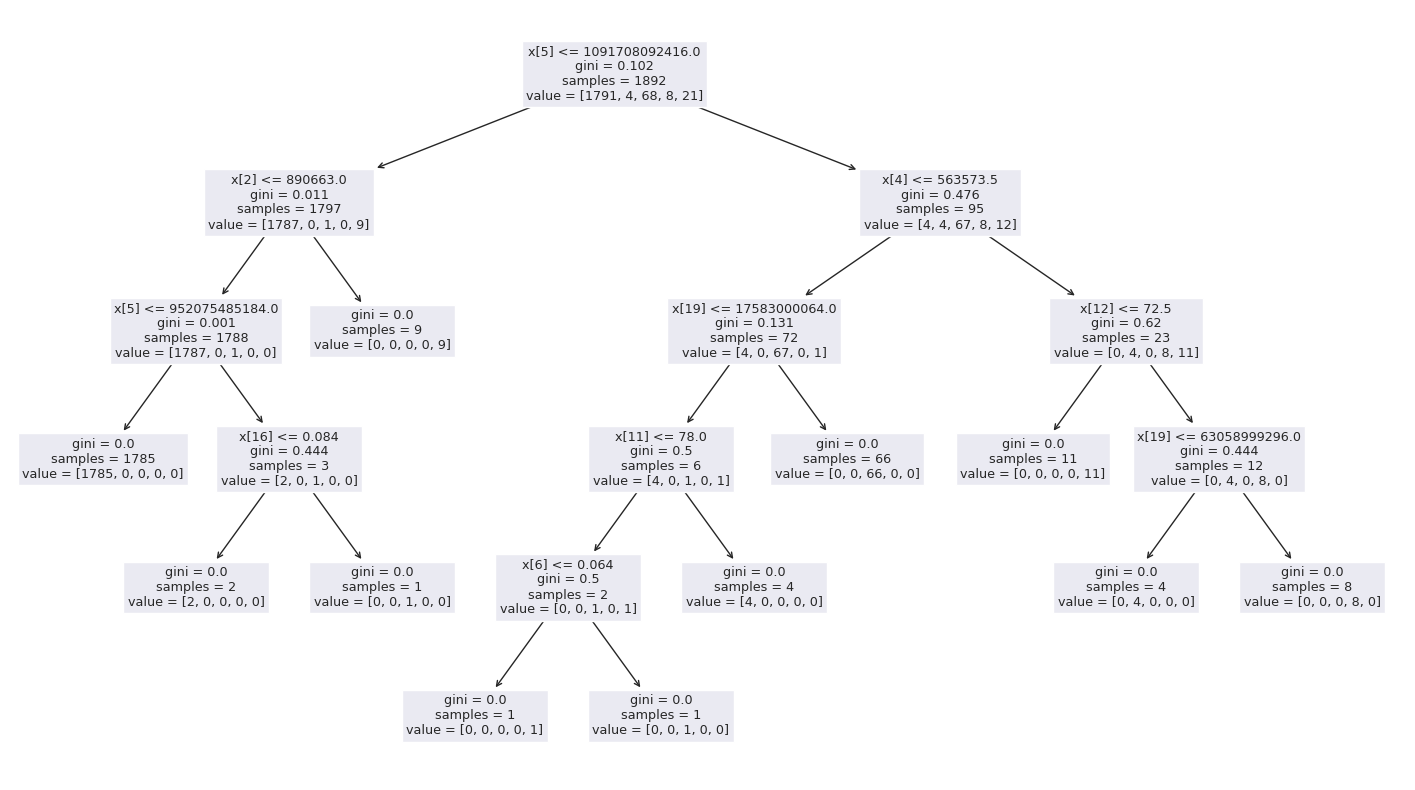

In [97]:
from sklearn import tree

plt.figure(figsize=(18,10))
tree.plot_tree(DT_model)

[Text(0.43333333333333335, 0.9166666666666666, 'GDP <= 1091708092416.0\ngini = 0.102\nsamples = 1892\nvalue = [1791, 4, 68, 8, 21]\nclass = 0'),
 Text(0.2, 0.75, 'CO2_Emissions <= 890663.0\ngini = 0.011\nsamples = 1797\nvalue = [1787, 0, 1, 0, 9]\nclass = 0'),
 Text(0.13333333333333333, 0.5833333333333334, 'GDP <= 952075485184.0\ngini = 0.001\nsamples = 1788\nvalue = [1787, 0, 1, 0, 0]\nclass = 0'),
 Text(0.06666666666666667, 0.4166666666666667, 'gini = 0.0\nsamples = 1785\nvalue = [1785, 0, 0, 0, 0]\nclass = 0'),
 Text(0.2, 0.4166666666666667, 'Population_65_more <= 0.084\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1, 0, 0]\nclass = 0'),
 Text(0.13333333333333333, 0.25, 'gini = 0.0\nsamples = 2\nvalue = [2, 0, 0, 0, 0]\nclass = 0'),
 Text(0.26666666666666666, 0.25, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]\nclass = 2'),
 Text(0.26666666666666666, 0.5833333333333334, 'gini = 0.0\nsamples = 9\nvalue = [0, 0, 0, 0, 9]\nclass = 4'),
 Text(0.6666666666666666, 0.75, 'Energy_Usage <= 

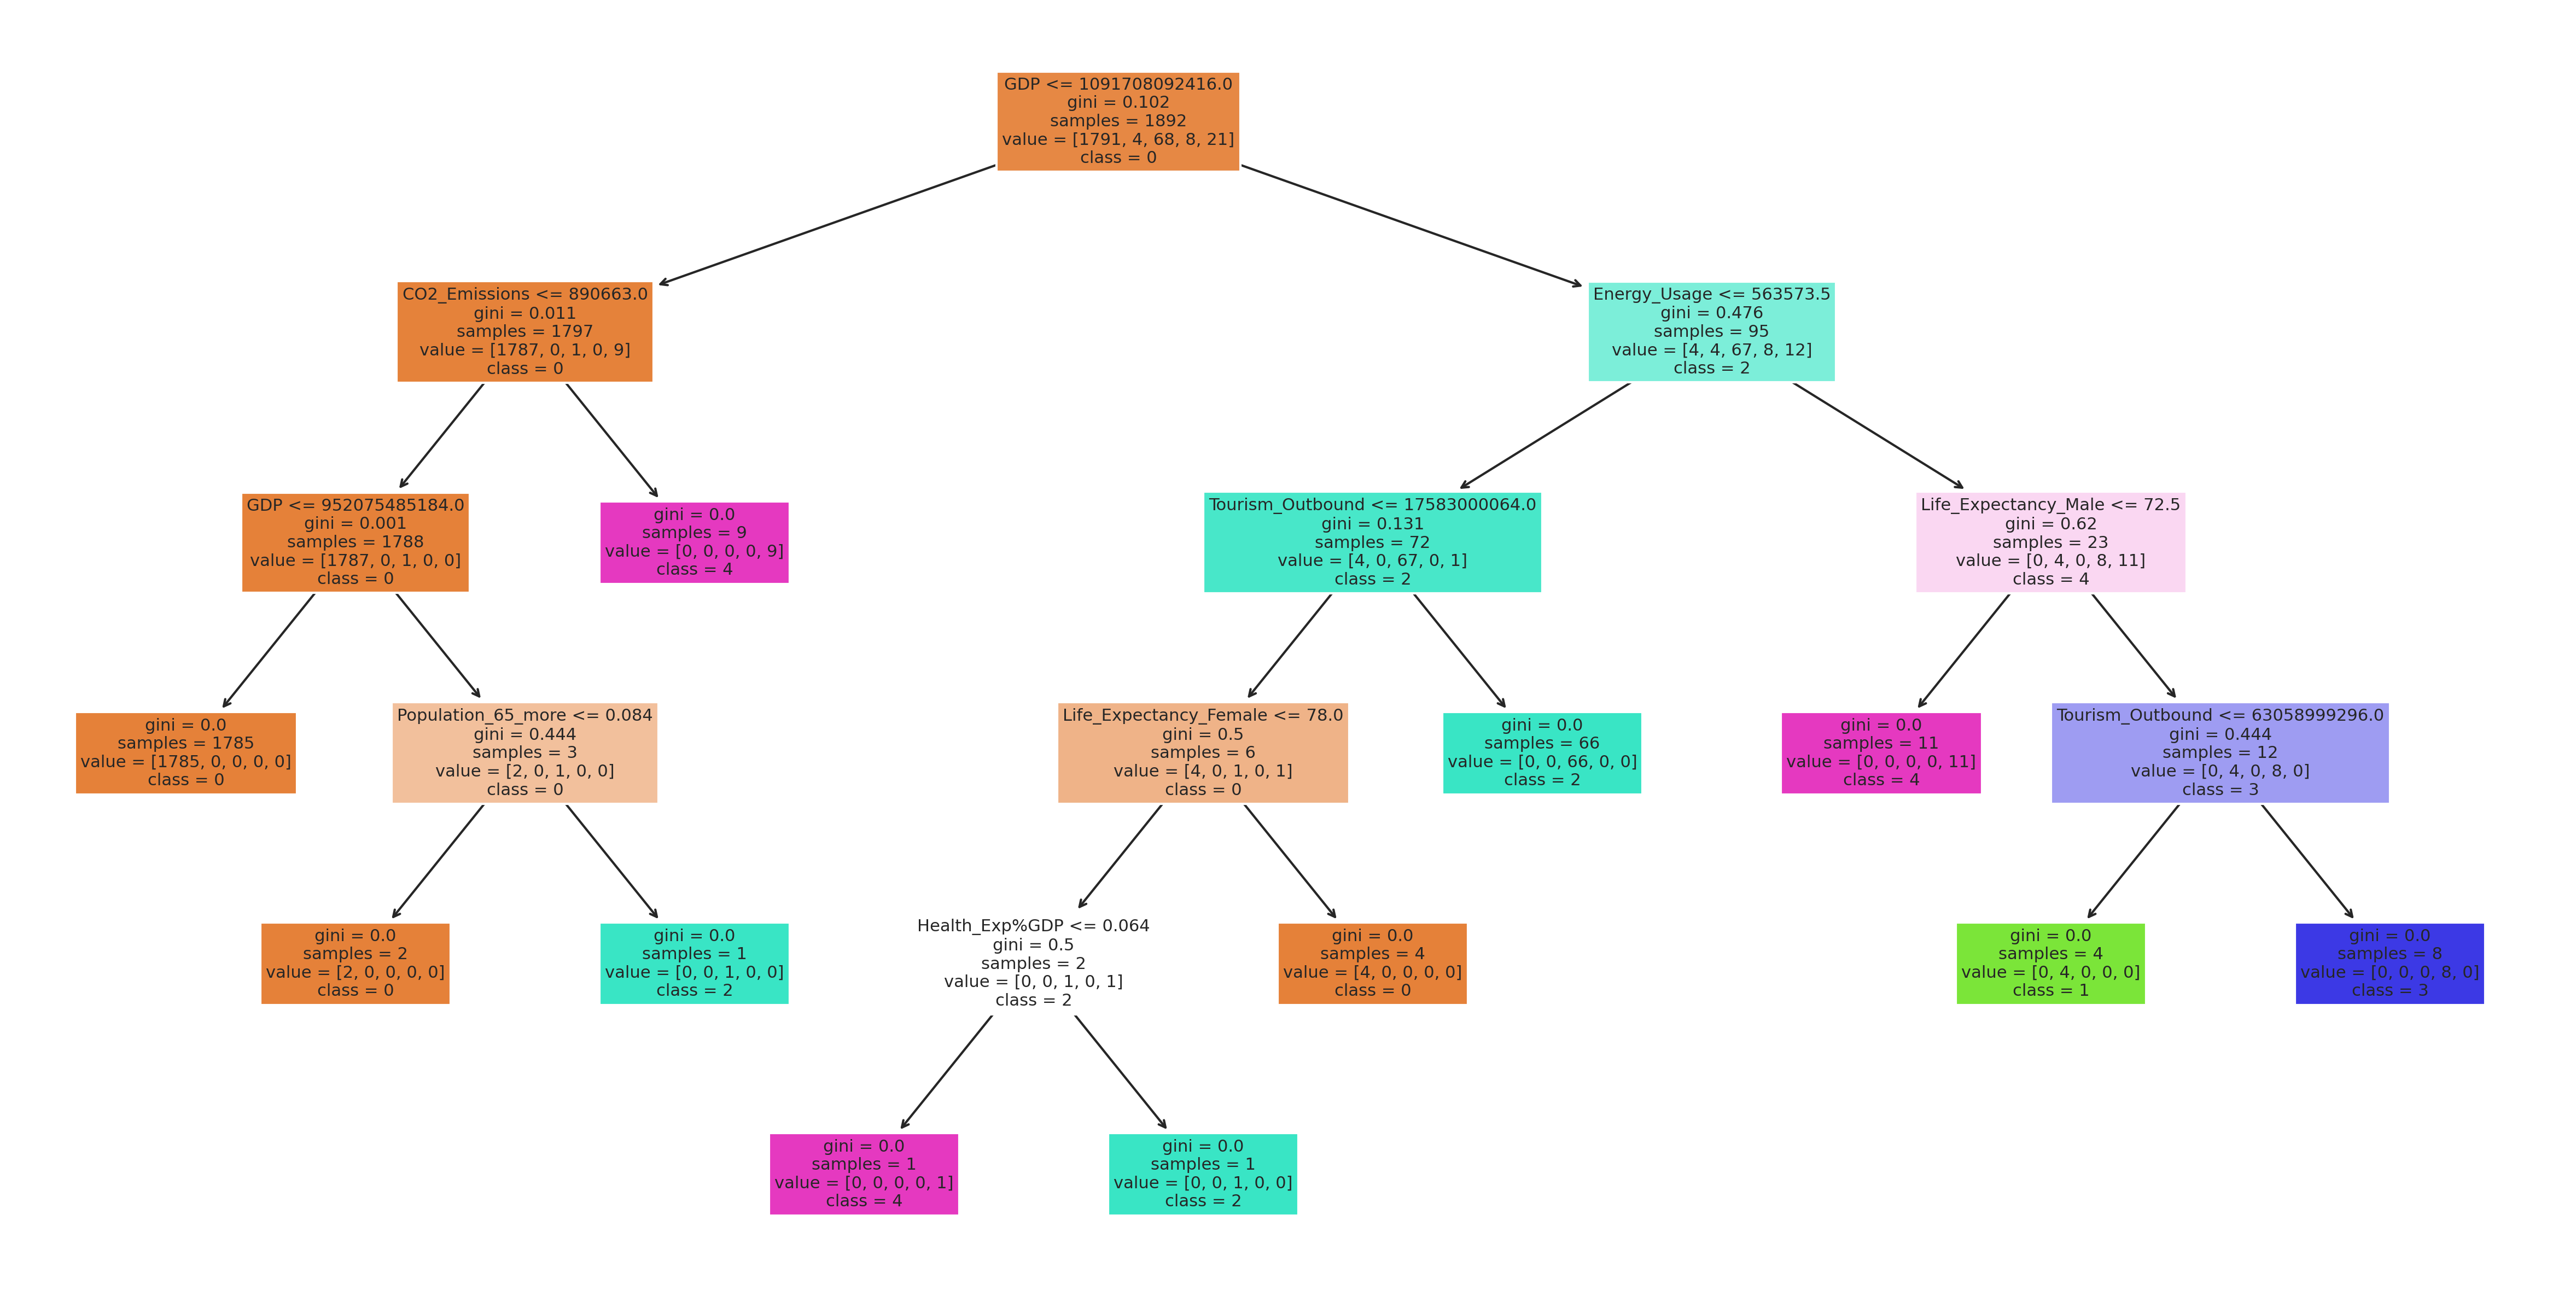

In [98]:
fn=['Population_Total', 'Birth_Rate', 'CO2_Emissions',
       'Days_to_Start_Business', 'Energy_Usage', 'GDP', 'Health_Exp%GDP',
       'Health_Exp/Capita', 'Infant_Mortality_Rate', 'Internet_Usage',
       'Lending_Interest', 'Life_Expectancy_Female', 'Life_Expectancy_Male',
       'Mobile_Phone_Usage', 'Population_0to14', 'Population_15to64',
       'Population_65_more', 'Population_Urban', 'Tourism_Inbound',
       'Tourism_Outbound']
cn=['0','1','2','3','4']
fig, axes=plt.subplots(nrows=1, ncols=1, figsize=(20,10), dpi=300)
tree.plot_tree(DT_model, feature_names=fn, class_names=cn, filled=True)

**DECISION TREE model on training dataset**

In [99]:
train_ypred4=DT_model.predict(x_train)
print("Trainging Data Result: ")
print("Classification Report: \n",classification_report(y_train, train_ypred4))
print('-'*70)
score4= metrics.accuracy_score(y_train, train_ypred4)
print('Accuracy: ',score4)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_train, train_ypred4))

Trainging Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1791
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        68
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        21

    accuracy                           1.00      1892
   macro avg       1.00      1.00      1.00      1892
weighted avg       1.00      1.00      1.00      1892

----------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------
confusion matrix: 
 [[1791    0    0    0    0]
 [   0    4    0    0    0]
 [   0    0   68    0    0]
 [   0    0    0    8    0]
 [   0    0    0    0   21]]


**DECISION TREE model on testing dataset**

In [100]:
test_ypred4=DT_model.predict(x_test)
print("Testing Data Result: ")
print("Classification Report: \n",classification_report(y_test, test_ypred4))
print('-'*70)
acc4= metrics.accuracy_score(y_test, test_ypred4)
print('Accuracy: ',acc4)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_test, test_ypred4))

Testing Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       766
           1       1.00      0.75      0.86         4
           2       0.91      0.97      0.94        30
           3       1.00      1.00      1.00         6
           4       0.75      1.00      0.86         6

    accuracy                           0.99       812
   macro avg       0.93      0.94      0.93       812
weighted avg       0.99      0.99      0.99       812

----------------------------------------------------------------------
Accuracy:  0.9938423645320197
----------------------------------------------------------------------
confusion matrix: 
 [[763   0   3   0   0]
 [  0   3   0   0   1]
 [  0   0  29   0   1]
 [  0   0   0   6   0]
 [  0   0   0   0   6]]


<b><h2> 5. RANDOM FOREST

In [101]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=10,criterion='gini',random_state=42)
RF_model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=10, random_state=42)

**RANDOM FOREST model on training dataset**

In [102]:
train_ypred5=RF_model.predict(x_train)
print("Trainging Data Result: ")
print("Classification Report: \n",classification_report(y_train, train_ypred5))
print('-'*70)
score5= metrics.accuracy_score(y_train, train_ypred5)
print('Accuracy: ',score5)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_train, train_ypred5))

Trainging Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1791
           1       1.00      1.00      1.00         4
           2       1.00      1.00      1.00        68
           3       1.00      1.00      1.00         8
           4       1.00      1.00      1.00        21

    accuracy                           1.00      1892
   macro avg       1.00      1.00      1.00      1892
weighted avg       1.00      1.00      1.00      1892

----------------------------------------------------------------------
Accuracy:  1.0
----------------------------------------------------------------------
confusion matrix: 
 [[1791    0    0    0    0]
 [   0    4    0    0    0]
 [   0    0   68    0    0]
 [   0    0    0    8    0]
 [   0    0    0    0   21]]


**RANDOM FOREST model on testing dataset**

In [103]:
test_ypred5=RF_model.predict(x_test)
print("Testing Data Result: ")
print("Classification Report: \n",classification_report(y_test, test_ypred5))
print('-'*70)
acc5= metrics.accuracy_score(y_test, test_ypred5)
print('Accuracy: ',acc5)
print('-'*70)

print('confusion matrix: \n',confusion_matrix(y_test, test_ypred5))

Testing Data Result: 
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       766
           1       1.00      0.75      0.86         4
           2       1.00      1.00      1.00        30
           3       1.00      1.00      1.00         6
           4       0.86      1.00      0.92         6

    accuracy                           1.00       812
   macro avg       0.97      0.95      0.96       812
weighted avg       1.00      1.00      1.00       812

----------------------------------------------------------------------
Accuracy:  0.9987684729064039
----------------------------------------------------------------------
confusion matrix: 
 [[766   0   0   0   0]
 [  0   3   0   0   1]
 [  0   0  30   0   0]
 [  0   0   0   6   0]
 [  0   0   0   0   6]]


In [104]:
results_dict= {'Models':['Logistic Regression','KNN','Naive Bayes','Decision Tree','Random Forest'],
               'Training Accuracy':[score1, score2, score3, score4, score5],
               'Testing Accuracy': [acc1, acc2, acc3, acc4, acc5]}
results_df=pd.DataFrame(results_dict)
results_df_sorted =results_df.sort_values(by=['Testing Accuracy','Training Accuracy'],ascending=False)
results_df_sorted

Models  Training Accuracy  Testing Accuracy
4        Random Forest           1.000000          0.998768
3        Decision Tree           1.000000          0.993842
1                  KNN           0.985201          0.977833
2          Naive Bayes           0.953488          0.939655
0  Logistic Regression           0.738901          0.715517

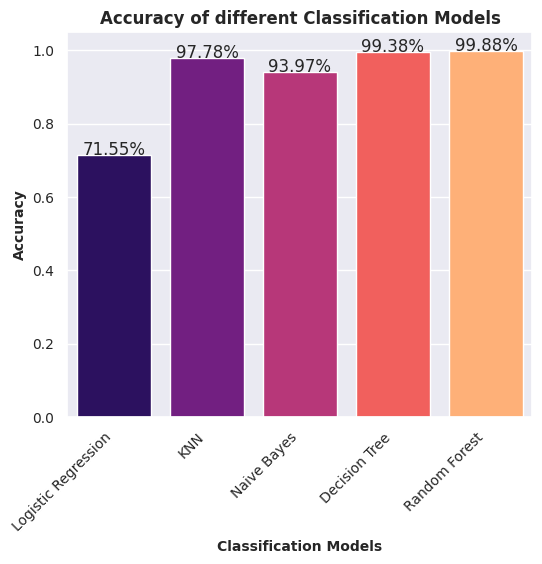

In [105]:
accuracy=[acc1,acc2,acc3,acc4,acc5]
models=['Logistic Regression','KNN','Naive Bayes','Decision Tree','Random Forest']
plt.figure(figsize=(6,5))
sns.set_style('darkgrid')
ax=sns.barplot(x=models, y=accuracy, palette='magma', saturation=1.5)
plt.ylabel('Accuracy',fontsize=10, fontweight='bold')
plt.xlabel('Classification Models',fontsize=10, fontweight='bold')
plt.title('Accuracy of different Classification Models',fontsize=12, fontweight='bold')
plt.xticks(rotation=45,fontsize=10,ha='right')
plt.yticks(fontsize=10)
for p in ax.patches:
    height=p.get_height()
    ax.annotate(f'{height:.2%}',(p.get_x()+ p.get_width()/2, height),ha='center', fontsize='medium')
plt.show()

In [106]:
import pickle

with open('kmeans.pkl', 'wb') as model_file:
    pickle.dump(kmeans, model_file)

In [107]:
final_df.to_csv('Clustered_Data.csv')

<b><h1> SAVING DECISION TREE MODEL FOR FUTURE PREDICTION

In [108]:
with open('RF.pkl', 'wb') as model_file2:
    pickle.dump(RF_model, model_file2)